# Import Libraries

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , StratifiedShuffleSplit, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import random
import calendar
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the data
from google.colab import files

# Read Data

In [ ]:
excel_file = pd.ExcelFile('Delta Airlines Loyalty Customer Raw Data.xlsx')

# Print sheet names
print("Sheet names:", excel_file.sheet_names)

# Get column names for each sheet
for sheet_name in excel_file.sheet_names:
    sheet_df = excel_file.parse(sheet_name)
    print(f"\nSheet: {sheet_name}")
    print(f"Columns: {sheet_df.columns.tolist()}")

Frequent_Flier_df = excel_file.parse('Frequent Flier Raw')
Flier_Upcoming_Flights_df = excel_file.parse('Flier Upcoming Flights Raw')
Upcoming_Flight_df = excel_file.parse('3 Month Upcoming Flights Raw')



Sheet names: ['Frequent Flier Raw', 'Flier Upcoming Flights Raw', '3 Month Upcoming Flights Raw']

Sheet: Frequent Flier Raw
Columns: ['Record Creation ', 'Frequent Flier Number', 'Join Date', 'First Name', 'Last Name', 'Inquiry Type', 'Most Recent Flight #', 'Lounge Used?', 'Departing Airport', 'Arrival Airport', 'Planned Snack?', 'Additional Snack?', '# of Included Checked Bags', 'Total # of Checked Bags', 'Flight Delayed?']

Sheet: Flier Upcoming Flights Raw
Columns: ['Join Date', 'Frequent Flier Number', 'First Name', 'Last Name', 'Flight Number', 'Flight Date', 'Departing City', 'Arrival City', 'Departure Time', 'Arrival Time', 'Departure Time Zone', 'Arrival Time Zone', 'Cost', 'Car Rental Addon $', 'Hotel Addon $']

Sheet: 3 Month Upcoming Flights Raw
Columns: ['Flight_ID', 'Flight Date', 'Departure City', 'Arrival City', 'Departure Time', 'Arrival Time', 'Departure Time Zone', 'Arrival Time Zone', 'Airline', 'Flight Number', 'Seat Class', 'Price', 'Currency', 'Available Seats',

# Make an EDA

## Explore Data Shape

In [ ]:
sheet_names = [Frequent_Flier_df, Flier_Upcoming_Flights_df, Upcoming_Flight_df]
for idx, sheet in enumerate(sheet_names, start=1):
    print(f"\nSheet {idx} :\n")
    print(f"Sheet {idx} Shapes: {sheet.shape}")
    #Numerical and Categorical features
    numerical_feats = sheet.dtypes[sheet.dtypes != "object"].index
    print("Number of Numerical features: ", len(numerical_feats))
    categorical_feats = sheet.dtypes[sheet.dtypes == "object"].index
    print("Number of Categorical features: ", len(categorical_feats))


Sheet 1 :

Sheet 1 Shapes: (9672, 15)
Number of Numerical features:  8
Number of Categorical features:  7

Sheet 2 :

Sheet 2 Shapes: (15078, 15)
Number of Numerical features:  1
Number of Categorical features:  14

Sheet 3 :

Sheet 3 Shapes: (20000, 24)
Number of Numerical features:  2
Number of Categorical features:  22


In [ ]:
Frequent_Flier_df.dtypes

,0
Record Creation,datetime64[ns]
Frequent Flier Number,float64
Join Date,object
First Name,object
Last Name,object
Inquiry Type,object
Most Recent Flight #,object
Lounge Used?,float64
Departing Airport,object
Arrival Airport,object


In [ ]:
#Explore first Tab
Flier_Upcoming_Flights_df.dtypes

,0
Join Date,object
Frequent Flier Number,int64
First Name,object
Last Name,object
Flight Number,object
Flight Date,object
Departing City,object
Arrival City,object
Departure Time,object
Arrival Time,object


In [ ]:
#Explore first Tab
Upcoming_Flight_df.dtypes

,0
Flight_ID,object
Flight Date,object
Departure City,object
Arrival City,object
Departure Time,object
Arrival Time,object
Departure Time Zone,object
Arrival Time Zone,object
Airline,object
Flight Number,object


## Explore Missing Values

Sheet 1 Missing Values:
Record Creation               461
Frequent Flier Number         532
Join Date                     535
First Name                    521
Last Name                     532
Inquiry Type                  521
Most Recent Flight #          519
Lounge Used?                  524
Departing Airport             499
Arrival Airport               500
Planned Snack?                529
Additional Snack?             540
# of Included Checked Bags    248
Total # of Checked Bags       533
Flight Delayed?               530
dtype: int64

Sheet 2 Missing Values:
Join Date                753
Frequent Flier Number      0
First Name               753
Last Name                  0
Flight Number              0
Flight Date                0
Departing City             0
Arrival City             753
Departure Time           753
Arrival Time             753
Departure Time Zone        0
Arrival Time Zone          0
Cost                     753
Car Rental Addon $       753
Hotel Addon $         

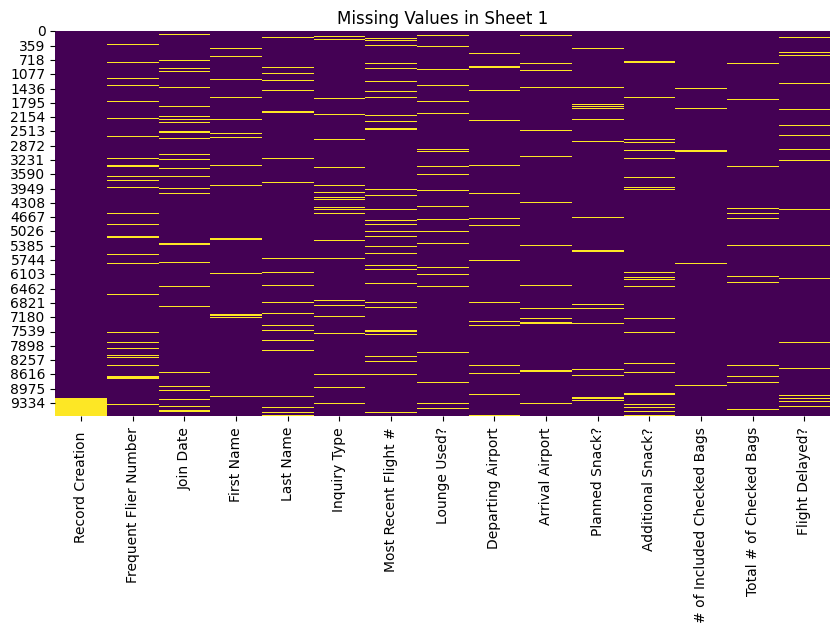

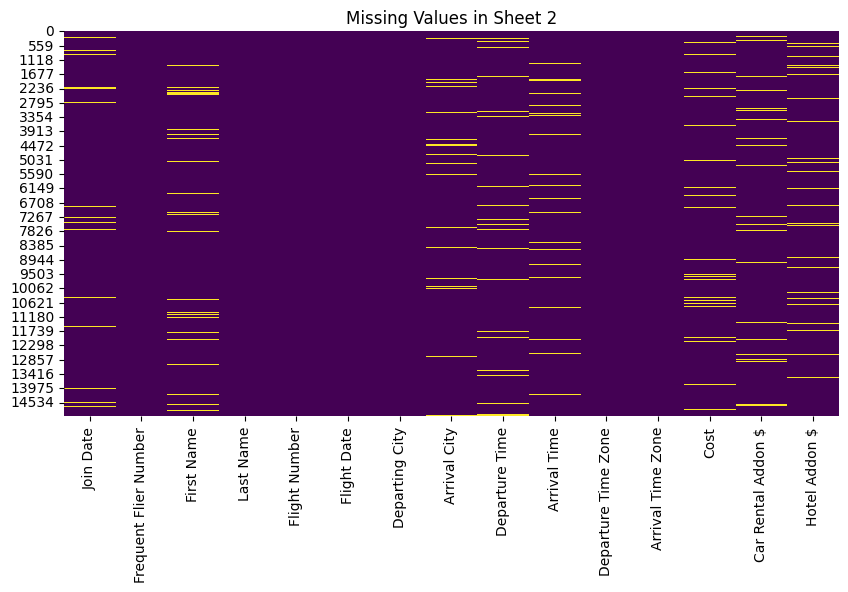

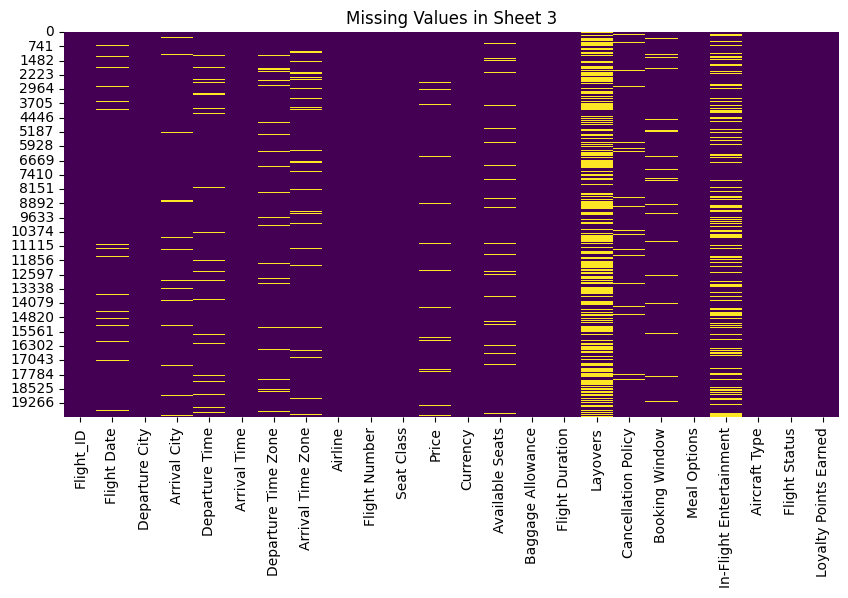

In [ ]:
# Missing Values
for idx, sheet in enumerate(sheet_names, start=1):
    print(f"Sheet {idx} Missing Values:\n{sheet.isnull().sum()}\n")

# Visualization of Missing Values
for idx, sheet in enumerate(sheet_names, start=1):
    plt.figure(figsize=(10, 5))
    sns.heatmap(sheet.isnull(), cbar=False, cmap='viridis')
    plt.title(f'Missing Values in Sheet {idx}')
    plt.show()

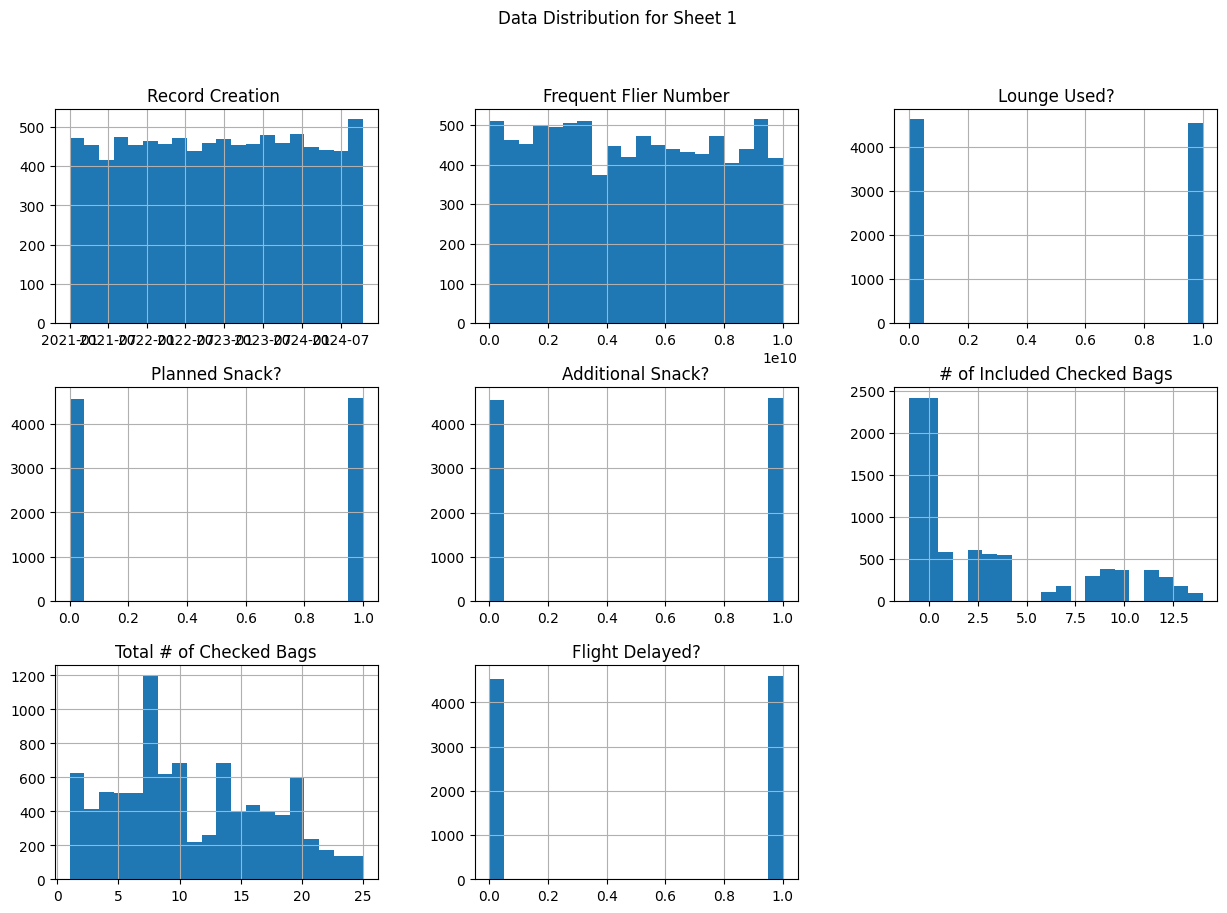

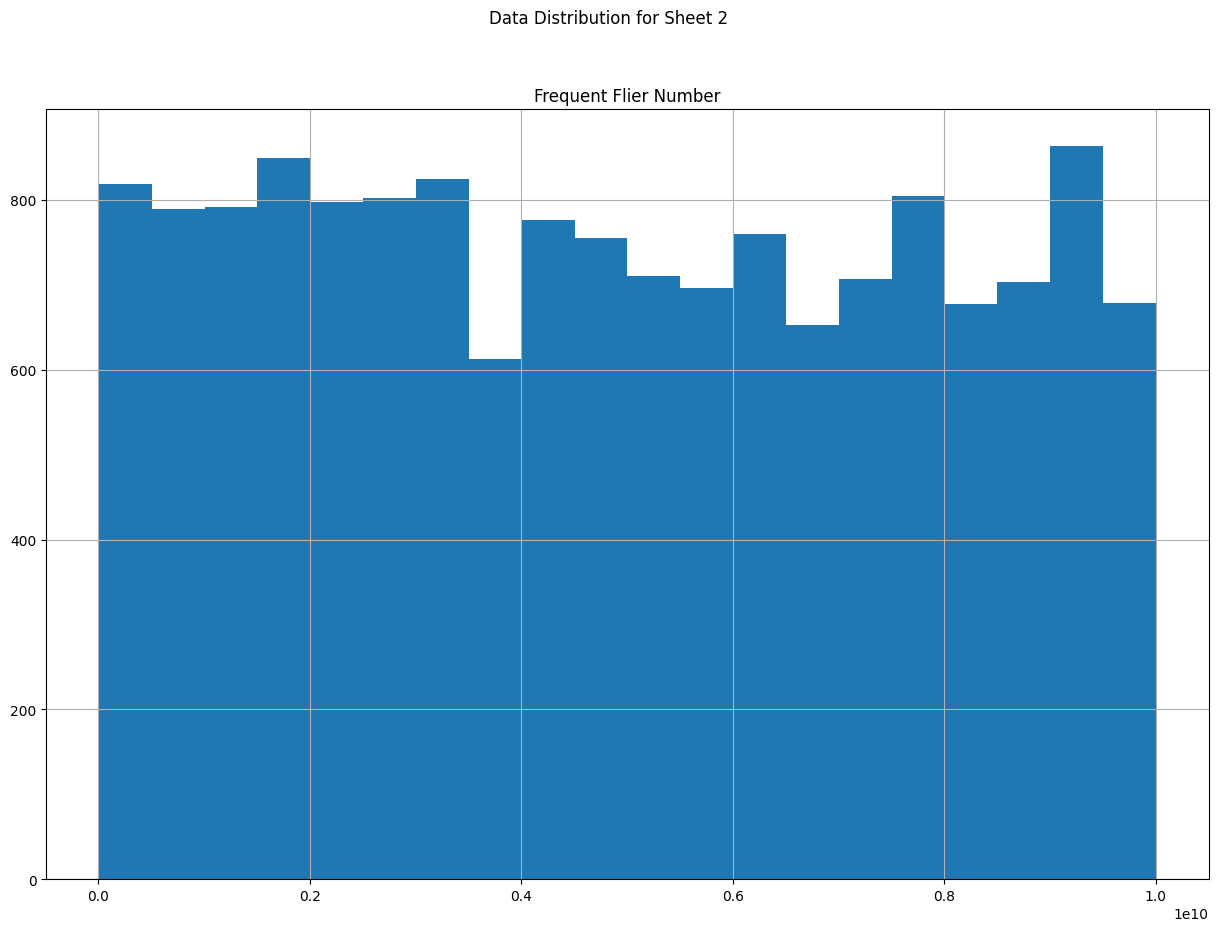

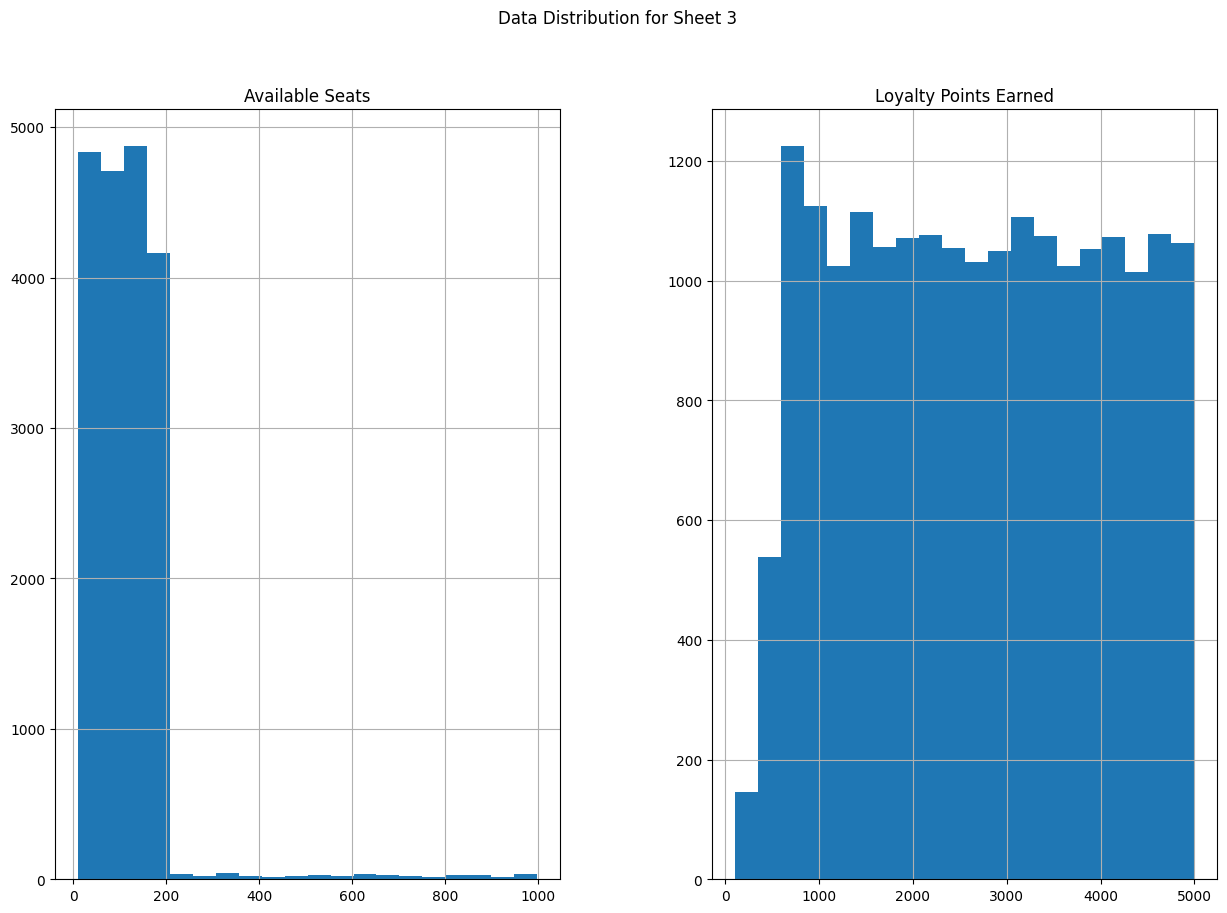

In [ ]:
# Data Distribution - Histograms
for idx, sheet in enumerate(sheet_names, start=1):
    sheet.hist(bins=20, figsize=(15, 10))
    plt.suptitle(f'Data Distribution for Sheet {idx}')
    plt.show()

## Explore duplicate

Sheet 1 Total Duplicates: 0
Sheet 2 Total Duplicates: 0
Sheet 3 Total Duplicates: 0

Duplicate Rows in Sheet 1:
Empty DataFrame
Columns: [Record Creation , Frequent Flier Number, Join Date, First Name, Last Name, Inquiry Type, Most Recent Flight #, Lounge Used?, Departing Airport, Arrival Airport, Planned Snack?, Additional Snack?, # of Included Checked Bags, Total # of Checked Bags, Flight Delayed?]
Index: []


Duplicate Rows in Sheet 2:
Empty DataFrame
Columns: [Join Date, Frequent Flier Number, First Name, Last Name, Flight Number, Flight Date, Departing City, Arrival City, Departure Time, Arrival Time, Departure Time Zone, Arrival Time Zone, Cost, Car Rental Addon $, Hotel Addon $]
Index: []


Duplicate Rows in Sheet 3:
Empty DataFrame
Columns: [Flight_ID, Flight Date, Departure City, Arrival City, Departure Time, Arrival Time, Departure Time Zone, Arrival Time Zone, Airline, Flight Number, Seat Class, Price, Currency, Available Seats, Baggage Allowance, Flight Duration, Layovers, 

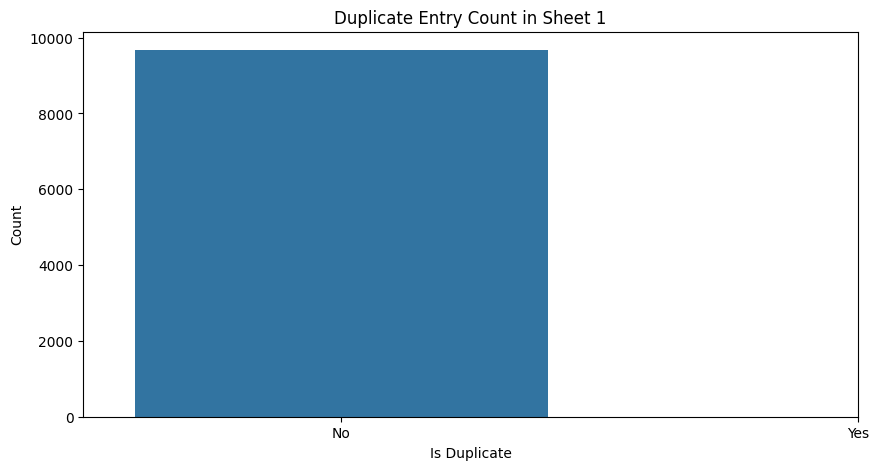

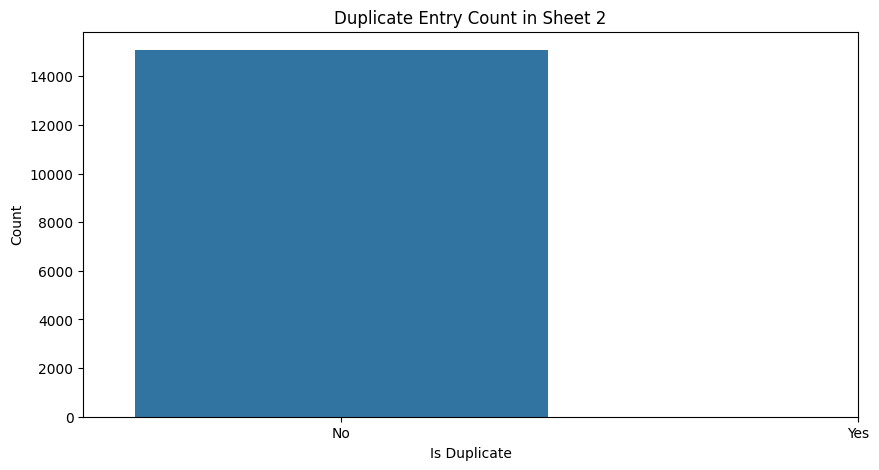

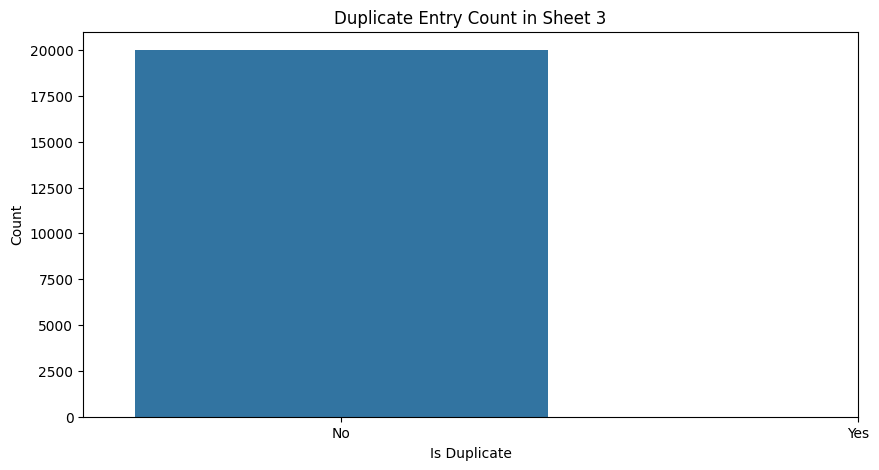

In [ ]:
# Check for Duplicates
for idx, sheet in enumerate(sheet_names, start=1):
    total_duplicates = sheet.duplicated().sum()
    print(f"Sheet {idx} Total Duplicates: {total_duplicates}")

# Identify Duplicate Rows
for idx, sheet in enumerate(sheet_names, start=1):
    duplicates = sheet[sheet.duplicated(keep=False)]
    print(f"\nDuplicate Rows in Sheet {idx}:\n{duplicates}\n")

# Count of Duplicate Entries by Specific Column
for idx, sheet in enumerate(sheet_names, start=1):
    if 'Frequent Flier Number' in sheet.columns:  # Change to your specific column
        duplicate_counts = sheet['Frequent Flier Number'].value_counts()
        duplicate_counts = duplicate_counts[duplicate_counts > 1]
        print(f"\nDuplicate Counts in Sheet {idx} for 'Frequent Flier Number':\n{duplicate_counts}\n")

# Visualize Duplicate Entries

for idx, sheet in enumerate(sheet_names, start=1):
    plt.figure(figsize=(10, 5))
    duplicate_counts = sheet.duplicated().value_counts()
    sns.barplot(x=duplicate_counts.index, y=duplicate_counts.values)
    plt.title(f'Duplicate Entry Count in Sheet {idx}')
    plt.xlabel('Is Duplicate')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
    plt.show()

## Drop Duplicate and Missing Value

### Verify Date Columns

In [ ]:
#Check Colums with Datetime Type
for idx, sheet in enumerate(sheet_names, start=1):
    print(f"Sheet {idx} - Columns with date types:\n{sheet.select_dtypes(include=['datetime']).columns}\n")


Sheet 1 - Columns with date types:
Index(['Record Creation '], dtype='object')

Sheet 2 - Columns with date types:
Index([], dtype='object')

Sheet 3 - Columns with date types:
Index([], dtype='object')



In [ ]:
# Check for invalid or missing dates
for idx, sheet in enumerate(sheet_names, start=1):
    for column in sheet.select_dtypes(include=['datetime']).columns:
        missing_dates = sheet[column].isna().sum()  # Count missing or invalid dates
        print(f"Sheet {idx} - Column '{column}' has {missing_dates} missing or invalid dates.")


Sheet 1 - Column 'Record Creation ' has 461 missing or invalid dates.


In [ ]:
#Converting data types
#[Frequent_Flier_df, Flier_Upcoming_Flights_df, Upcoming_Flight_df]
Frequent_Flier_df['Join Date'] = pd.to_datetime(Frequent_Flier_df['Join Date'], errors='coerce')

Flier_Upcoming_Flights_df['Join Date'] = pd.to_datetime(Flier_Upcoming_Flights_df['Join Date'], errors='coerce')
Flier_Upcoming_Flights_df['Flight Date'] = pd.to_datetime(Flier_Upcoming_Flights_df['Flight Date'], errors='coerce')

Upcoming_Flight_df['Flight Date'] = pd.to_datetime(Upcoming_Flight_df['Flight Date'], errors='coerce')



In [ ]:
# Drop rows with missing dates
for idx, sheet in enumerate(sheet_names, start=1):
    for column in sheet.select_dtypes(include=['datetime']).columns:
        sheet.dropna(subset=[column], inplace=True)  # Drop rows with NaT values

In [ ]:
# Check for invalid or missing dates after cleanning
for idx, sheet in enumerate(sheet_names, start=1):
    for column in sheet.select_dtypes(include=['datetime']).columns:
        missing_dates = sheet[column].isna().sum()  # Count missing or invalid dates
        print(f"Sheet {idx} - Column '{column}' has {missing_dates} missing or invalid dates.")


Sheet 1 - Column 'Record Creation ' has 0 missing or invalid dates.
Sheet 1 - Column 'Join Date' has 0 missing or invalid dates.
Sheet 2 - Column 'Join Date' has 0 missing or invalid dates.
Sheet 2 - Column 'Flight Date' has 0 missing or invalid dates.
Sheet 3 - Column 'Flight Date' has 0 missing or invalid dates.


### Verify Time Columns

In [ ]:
#Converting time types
#[Frequent_Flier_df, Flier_Upcoming_Flights_df, Upcoming_Flight_df]

Flier_Upcoming_Flights_df['Arrival Time'] = pd.to_datetime(Flier_Upcoming_Flights_df['Arrival Time'], errors='coerce', format='%H:%M:%S').dt.time
Flier_Upcoming_Flights_df['Departure Time'] = pd.to_datetime(Flier_Upcoming_Flights_df['Departure Time'], errors='coerce', format='%H:%M:%S').dt.time

Upcoming_Flight_df['Arrival Time'] = pd.to_datetime(Upcoming_Flight_df['Arrival Time'], errors='coerce', format='%H:%M:%S').dt.time
Upcoming_Flight_df['Departure Time'] = pd.to_datetime(Upcoming_Flight_df['Departure Time'], errors='coerce', format='%H:%M:%S').dt.time


### Verify Text Columns

In [ ]:
#Check Colums with Datetime Type
for idx, sheet in enumerate(sheet_names, start=1):
    print(f"Sheet {idx} - Columns with text types:\n{sheet.select_dtypes(include=['object']).columns}\n")

Sheet 1 - Columns with text types:
Index(['First Name', 'Last Name', 'Inquiry Type', 'Most Recent Flight #',
       'Departing Airport', 'Arrival Airport'],
      dtype='object')

Sheet 2 - Columns with text types:
Index(['First Name', 'Last Name', 'Flight Number', 'Departing City',
       'Arrival City', 'Departure Time', 'Arrival Time', 'Departure Time Zone',
       'Arrival Time Zone', 'Cost', 'Car Rental Addon $', 'Hotel Addon $'],
      dtype='object')

Sheet 3 - Columns with text types:
Index(['Flight_ID', 'Departure City', 'Arrival City', 'Departure Time',
       'Arrival Time', 'Departure Time Zone', 'Arrival Time Zone', 'Airline',
       'Flight Number', 'Seat Class', 'Price', 'Currency', 'Baggage Allowance',
       'Flight Duration', 'Layovers', 'Cancellation Policy', 'Booking Window',
       'Meal Options', 'In-Flight Entertainment', 'Aircraft Type',
       'Flight Status'],
      dtype='object')



In [ ]:
# Drop rows with missing Text
for idx, sheet in enumerate(sheet_names, start=1):
    for column in sheet.select_dtypes(include=['object']).columns:
        sheet.dropna(subset=[column], inplace=True)  # Drop rows with NaT values

In [ ]:
# Check for invalid or missing dates after cleanning
for idx, sheet in enumerate(sheet_names, start=1):
    for column in sheet.select_dtypes(include=['object']).columns:
        missing_dates = sheet[column].isna().sum()  # Count missing or invalid text
        print(f"Sheet {idx} - Column '{column}' has {missing_dates} missing or invalid Text.")

Sheet 1 - Column 'First Name' has 0 missing or invalid dates.
Sheet 1 - Column 'Last Name' has 0 missing or invalid dates.
Sheet 1 - Column 'Inquiry Type' has 0 missing or invalid dates.
Sheet 1 - Column 'Most Recent Flight #' has 0 missing or invalid dates.
Sheet 1 - Column 'Departing Airport' has 0 missing or invalid dates.
Sheet 1 - Column 'Arrival Airport' has 0 missing or invalid dates.
Sheet 2 - Column 'First Name' has 0 missing or invalid dates.
Sheet 2 - Column 'Last Name' has 0 missing or invalid dates.
Sheet 2 - Column 'Flight Number' has 0 missing or invalid dates.
Sheet 2 - Column 'Departing City' has 0 missing or invalid dates.
Sheet 2 - Column 'Arrival City' has 0 missing or invalid dates.
Sheet 2 - Column 'Departure Time' has 0 missing or invalid dates.
Sheet 2 - Column 'Arrival Time' has 0 missing or invalid dates.
Sheet 2 - Column 'Departure Time Zone' has 0 missing or invalid dates.
Sheet 2 - Column 'Arrival Time Zone' has 0 missing or invalid dates.
Sheet 2 - Column 

### Verify Numerical columns

In [ ]:
#Check Colums with Datetime Type
for idx, sheet in enumerate(sheet_names, start=1):
    print(f"Sheet {idx} - Columns with date types:\n{sheet.select_dtypes(include=['float64']).columns}\n")

Sheet 1 - Columns with date types:
Index(['Frequent Flier Number', 'Lounge Used?', 'Planned Snack?',
       'Additional Snack?', '# of Included Checked Bags',
       'Total # of Checked Bags', 'Flight Delayed?'],
      dtype='object')

Sheet 2 - Columns with date types:
Index([], dtype='object')

Sheet 3 - Columns with date types:
Index(['Available Seats'], dtype='object')



In [ ]:
#Check Colums with Datetime Type
for idx, sheet in enumerate(sheet_names, start=1):
    print(f"Sheet {idx} - Columns with date types:\n{sheet.select_dtypes(include=['int64']).columns}\n")

Sheet 1 - Columns with date types:
Index([], dtype='object')

Sheet 2 - Columns with date types:
Index(['Frequent Flier Number'], dtype='object')

Sheet 3 - Columns with date types:
Index(['Loyalty Points Earned'], dtype='object')



In [ ]:
# Check for invalid or missing dates
for idx, sheet in enumerate(sheet_names, start=1):
    for column in sheet.select_dtypes(include=['float64']).columns:
        missing_float = sheet[column].isna().sum()  # Count missing or invalid dates
        print(f"Sheet {idx} - Column '{column}' has {missing_float} missing or invalid float.")

Sheet 1 - Column 'Frequent Flier Number' has 0 missing or invalid dates.
Sheet 1 - Column 'Lounge Used?' has 0 missing or invalid dates.
Sheet 1 - Column 'Planned Snack?' has 0 missing or invalid dates.
Sheet 1 - Column 'Additional Snack?' has 0 missing or invalid dates.
Sheet 1 - Column '# of Included Checked Bags' has 0 missing or invalid dates.
Sheet 1 - Column 'Total # of Checked Bags' has 0 missing or invalid dates.
Sheet 1 - Column 'Flight Delayed?' has 0 missing or invalid dates.
Sheet 3 - Column 'Available Seats' has 0 missing or invalid dates.


In [ ]:
# Check for invalid or missing dates
for idx, sheet in enumerate(sheet_names, start=1):
    for column in sheet.select_dtypes(include=['int64']).columns:
        missing_int = sheet[column].isna().sum()  # Count missing or invalid dates
        print(f"Sheet {idx} - Column '{column}' has {missing_int} missing or invalid int.")

Sheet 2 - Column 'Frequent Flier Number' has 0 missing or invalid dates.
Sheet 3 - Column 'Loyalty Points Earned' has 0 missing or invalid dates.


In [ ]:
# Drop rows with missing Text
for idx, sheet in enumerate(sheet_names, start=1):
    for column in sheet.select_dtypes(include=['float64']).columns:
        sheet.dropna(subset=[column], inplace=True)  # Drop rows with NaT values

In [ ]:
# Drop rows with missing Text
for idx, sheet in enumerate(sheet_names, start=1):
    for column in sheet.select_dtypes(include=['int64']).columns:
        sheet.dropna(subset=[column], inplace=True)  # Drop rows with NaT values

In [ ]:
# Rechecking for Missing Values and Duplicates
for idx, sheet in enumerate(sheet_names, start=1):
    print(f"Sheet {idx} - Missing Values:\n{sheet.isnull().sum()}\n")
    print(f"Sheet {idx} - Duplicate Rows: {sheet.duplicated().sum()}\n")


Sheet 1 - Missing Values:
Record Creation               0
Frequent Flier Number         0
Join Date                     0
First Name                    0
Last Name                     0
Inquiry Type                  0
Most Recent Flight #          0
Lounge Used?                  0
Departing Airport             0
Arrival Airport               0
Planned Snack?                0
Additional Snack?             0
# of Included Checked Bags    0
Total # of Checked Bags       0
Flight Delayed?               0
dtype: int64

Sheet 1 - Duplicate Rows: 0

Sheet 2 - Missing Values:
Join Date                0
Frequent Flier Number    0
First Name               0
Last Name                0
Flight Number            0
Flight Date              0
Departing City           0
Arrival City             0
Departure Time           0
Arrival Time             0
Departure Time Zone      0
Arrival Time Zone        0
Cost                     0
Car Rental Addon $       0
Hotel Addon $            0
dtype: int64

Sheet 

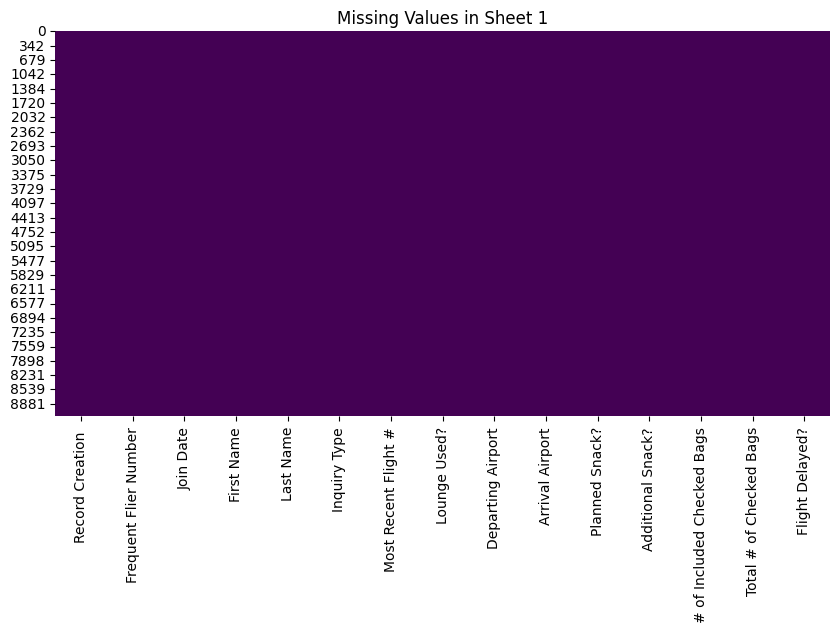

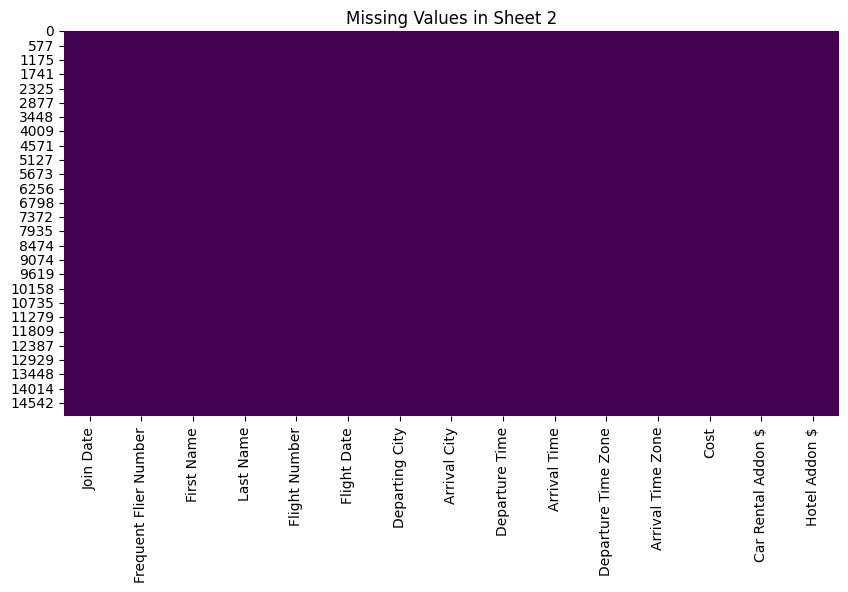

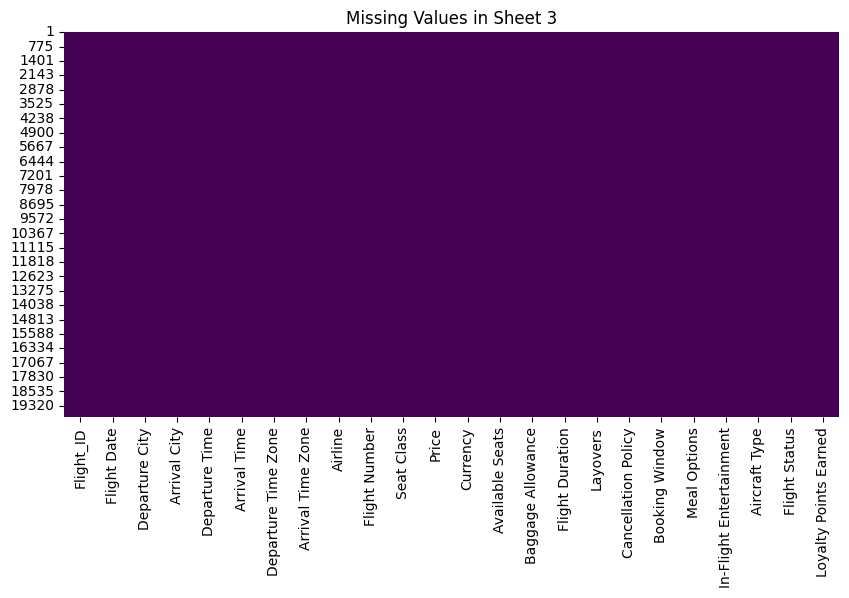

In [ ]:
# Visualization of Missing Values
for idx, sheet in enumerate(sheet_names, start=1):
    plt.figure(figsize=(10, 5))
    sns.heatmap(sheet.isnull(), cbar=False, cmap='viridis')
    plt.title(f'Missing Values in Sheet {idx}')
    plt.show()

## Standardizing Data

### Standardizing Text Data

In [ ]:
# Standardizing text data

Frequent_Flier_df['First Name'] = Frequent_Flier_df['First Name'].str.strip().str.lower()  # Change column name accordingly
Frequent_Flier_df['Last Name'] = Frequent_Flier_df['Last Name'].str.strip().str.lower()

Frequent_Flier_df['Departing Airport'] = Frequent_Flier_df['Departing Airport'].str.strip().str.upper()  # Change column name accordingly
Frequent_Flier_df['Departing Airport'] = Frequent_Flier_df['Departing Airport'].str.strip().str.upper()

In [ ]:
Flier_Upcoming_Flights_df['First Name'] = Flier_Upcoming_Flights_df['First Name'].str.strip().str.lower()  # Change column name accordingly
Flier_Upcoming_Flights_df['Last Name'] = Flier_Upcoming_Flights_df['Last Name'].str.strip().str.lower()

### Standardizing Boolean Data

# Clean data

In [ ]:
for idx, sheet in enumerate(sheet_names, start=1):
  print(f"\nSheet: {idx}")
  print(sheet.head())
  print(sheet.dtypes)



Sheet: 1
  Record Creation   Frequent Flier Number  Join Date First Name Last Name  \
0       2024-02-27           7.234618e+09 1988-07-08     debbie    spears   
1       2021-03-07           7.234618e+09 1988-07-08     debbie    spears   
2       2023-01-31           7.234618e+09 1988-07-08     debbie    spears   
5       2022-08-30           5.511217e+08 2022-06-16       kyle     boone   
6       2022-10-25           5.511217e+08 2022-06-16       kyle     boone   

    Inquiry Type Most Recent Flight #  Lounge Used? Departing Airport  \
0  Flight Status            G35206241           0.0               DFW   
1     New Flight            V81311927           1.0               JFK   
2  Cancel Flight            H82295055           0.0               MIA   
5  Flight Status            R17922982           0.0               SFO   
6  Cancel Flight            Q79735097           1.0               MIA   

  Arrival Airport  Planned Snack?  Additional Snack?  \
0             DEN             0.

# DATA Pre Processing AND Visualization





Read Clean Data

In [ ]:
excel_file = pd.ExcelFile('Delta Airlines Loyalty Customer Cleansed Data.xlsx')

# Print sheet names
print("Sheet names:", excel_file.sheet_names)

# Get column names for each sheet
for sheet_name in excel_file.sheet_names:
    sheet_df = excel_file.parse(sheet_name)
    print(f"\nSheet: {sheet_name}")
    print(f"Columns: {sheet_df.columns.tolist()}")

df_frequent_flyer = excel_file.parse('Frequent Flier Cleansed1')
df_upcoming_flights = excel_file.parse('Flier Upcoming Flights')
df_3_month_upcoming = excel_file.parse('3 Month Upcoming Flight')

Sheet names: ['Frequent Flier Cleansed1', 'Flier Upcoming Flights', '3 Month Upcoming Flight']

Sheet: Frequent Flier Cleansed1
Columns: ['Record Creation Date', 'Join Date', 'Frequent Flier Number', 'First Name', 'Last Name', 'Inquiry Type', 'Most Recent Flight #', 'Lounge Used?', 'Departing Airport', 'Arrival Airport', 'Planned Snack?', 'Additional Snack?', '# of Included Checked Bags', 'Total # of Checked Bags', 'Flight Delayed?', 'Lead Source', 'Online Check-In', 'Add-On Spend']

Sheet: Flier Upcoming Flights
Columns: ['Join Date', 'Frequent Flier Number', 'First Name', 'Last Name', 'Flight Number', 'Flight Date', 'Departing City', 'Arrival City', 'Departure Time', 'Departure Time Zone', 'Arrival Time', 'Arrival Time Zone', 'Cost', 'Car Rental Addon $', 'Hotel Addon $']

Sheet: 3 Month Upcoming Flight
Columns: ['Flight_ID', 'Flight Date', 'Departure City', 'Arrival City', 'Departure Time', 'Arrival Time', 'Departure Time Zone', 'Arrival Time Zone', 'Airline', 'Flight Number', 'Seat

## Data Wrangling

In [ ]:
# Define a function to extract currency
def extract_currency(value):
    match = re.search(r'([A-Z]+)', str(value))  # Match currency code
    if match:
        return match.group(1)
    else:
        return None  # Handle cases where currency is not found



# Define a function to extract price
def extract_price(value):
    match = re.search(r'([\d.]+)', str(value))  # Match numeric price
    if match:
        return float(match.group(1))
    else:
        return None  # Handle cases where price is not found

> Sheet 1 : Frequent Flier

In [ ]:
# Create new columns for month and year
df_frequent_flyer['Year'] = df_frequent_flyer['Record Creation Date'].dt.year

df_frequent_flyer['Month'] = df_frequent_flyer['Record Creation Date'].dt.month

df_frequent_flyer['Month'] = df_frequent_flyer['Month'].apply(lambda x: calendar.month_name[x])

df_frequent_flyer['dayofweek'] = df_frequent_flyer['Record Creation Date'].dt.dayofweek.apply(lambda x: calendar.day_name[x])



df_frequent_flyer['Name'] = df_frequent_flyer['First Name'] + ' ' + df_frequent_flyer['Last Name']


# Create a 'flight_status' column with default value 'On-time'
df_frequent_flyer['flight_status'] = 'On-time'
# Update the 'flight_status' based on conditions
df_frequent_flyer.loc[df_frequent_flyer['Flight Delayed?'] > 0, 'flight_status'] = 'Delayed'
df_frequent_flyer.loc[df_frequent_flyer['Inquiry Type'] == 'Cancel Flight' , 'flight_status'] = 'Cancelled'

In [ ]:
# Calculate customer tenure (time since joining)
df_frequent_flyer['Tenure'] = (df_frequent_flyer['Record Creation Date'] - df_frequent_flyer['Join Date']).dt.days

 > Sheet 2 : Flier Upcoming Flights

In [ ]:
df_upcoming_flights['Departure Time'] = pd.to_datetime(df_upcoming_flights['Departure Time'], format='%H:%M:%S', errors='coerce')
df_upcoming_flights['Arrival Time'] = pd.to_datetime(df_upcoming_flights['Arrival Time'], format='%H:%M:%S', errors='coerce')

# Create new columns for departure and arrival times in UTC
df_upcoming_flights['Departure Time UTC'] = df_upcoming_flights['Departure Time'].dt.tz_localize('UTC')
df_upcoming_flights['Arrival Time UTC'] = df_upcoming_flights['Arrival Time'].dt.tz_localize('UTC')

# Calculate flight duration using UTC times
df_upcoming_flights['flight_duration'] = (df_upcoming_flights['Arrival Time UTC'] - df_upcoming_flights['Departure Time UTC']).dt.total_seconds() / 3600  # Duration in hour

df_upcoming_flights['Month'] = df_upcoming_flights['Flight Date'].dt.month.apply(lambda x: calendar.month_name[x])
df_upcoming_flights['Year'] = df_upcoming_flights['Flight Date'].dt.year
df_upcoming_flights['Day'] = df_upcoming_flights['Flight Date'].dt.day
df_upcoming_flights['Day of Week'] = df_upcoming_flights['Flight Date'].dt.dayofweek.apply(lambda x: calendar.day_name[x])

In [ ]:

# Extract currency from 'Cost' column and save it to a new column
df_upcoming_flights['Currency'] = df_upcoming_flights['Cost'].apply(extract_currency)

# Extract price from the relevant columns
df_upcoming_flights['Hotel Addon Price'] = df_upcoming_flights['Hotel Addon $'].apply(extract_price)
df_upcoming_flights['Car Rental Price'] = df_upcoming_flights['Car Rental Addon $'].apply(extract_price)
df_upcoming_flights['Cost Price'] = df_upcoming_flights['Cost'].apply(extract_price)


# Get unique currencies in the dataset
currencies = df_upcoming_flights['Currency'].dropna().unique()
# Example: Convert all prices to USD (using hypothetical exchange rates)
exchange_rates = {'AUD': 0.70, 'EUR': 1.10, 'GBP': 1.30}  # Example exchange rates

# Generate random exchange rates for each currency (base currency: USD)
exchange_rates = {currency: round(random.uniform(0.5, 1.5), 2) for currency in currencies}  # Random rates between 0.5 and 1.5

df_upcoming_flights['Hotel Addon USD'] = df_upcoming_flights.apply(lambda row: row['Hotel Addon Price'] * exchange_rates.get(row['Currency'], 1), axis=1)
df_upcoming_flights['Car Rental USD'] = df_upcoming_flights.apply(lambda row: row['Car Rental Price'] * exchange_rates.get(row['Currency'], 1), axis=1)
df_upcoming_flights['Cost USD'] = df_upcoming_flights.apply(lambda row: row['Cost Price'] * exchange_rates.get(row['Currency'], 1), axis=1)




> Sheet 3 Month Upcoming Flights

In [ ]:
df_3_month_upcoming['Flight Duration Numeric'] = df_3_month_upcoming['Flight Duration'].str.extract(r'(\d+)').astype(int)
# Assuming your existing flight duration column is named 'Flight Duration'
df_3_month_upcoming['Baggage Allowance Numeric'] = df_3_month_upcoming['Baggage Allowance'].str.extract(r'(\d+)').astype(int)
df_3_month_upcoming['Price Numeric'] = df_3_month_upcoming['Price'].str.extract(r'(\d+)').astype(float)
df_3_month_upcoming['Booking Window'] = df_3_month_upcoming['Booking Window'].str.extract(r'(\d+)').astype(int)

df_3_month_upcoming['Month'] = df_3_month_upcoming['Flight Date'].dt.month.apply(lambda x: calendar.month_name[x])
df_3_month_upcoming['Year'] = df_3_month_upcoming['Flight Date'].dt.year
df_3_month_upcoming['Day'] = df_3_month_upcoming['Flight Date'].dt.day
df_3_month_upcoming['Day of Week'] = df_3_month_upcoming['Flight Date'].dt.dayofweek.apply(lambda x: calendar.day_name[x])

In [ ]:
df_3_month_upcoming['Price Numeric'] = df_3_month_upcoming.apply(lambda row: row['Price Numeric'] * exchange_rates.get(row['Currency'], 1), axis=1)

## Data Visualisation

> ### Sheet 1 : Frequent Flier

In [ ]:
df_frequent_flyer.head()

,Record Creation Date,Join Date,Frequent Flier Number,First Name,Last Name,Inquiry Type,Most Recent Flight #,Lounge Used?,Departing Airport,Arrival Airport,...,Total # of Checked Bags,Flight Delayed?,Lead Source,Online Check-In,Add-On Spend,Year,Month,dayofweek,Name,flight_status
0,2024-02-27,1988-07-08,7234617746,Debbie,Spears,Flight Status,G35206241,False,HND,HND,...,7,True,Travel Agency,False,21.14,2024,February,Tuesday,Debbie Spears,Delayed
1,2021-03-07,1988-07-08,7234617746,Debbie,Spears,New Flight,V81311927,True,JFK,SFO,...,6,False,Travel Agency,False,95.57,2021,March,Sunday,Debbie Spears,On-time
2,2023-01-31,1988-07-08,7234617746,Debbie,Spears,Cancel Flight,H82295055,False,CDG,ORD,...,5,True,Discounted Promo,False,8.66,2023,January,Tuesday,Debbie Spears,Cancelled
3,2021-08-21,2022-06-16,551121699,Kyle,Boone,New Flight,E39886834,True,SEA,DEN,...,8,False,Discounted Promo,False,82.59,2021,August,Saturday,Kyle Boone,On-time
4,2022-03-01,2022-06-16,551121699,Kyle,Boone,New Flight,R04390271,True,SFO,DXB,...,5,False,Discounted Promo,False,26.70,2022,March,Tuesday,Kyle Boone,On-time


<Axes: >

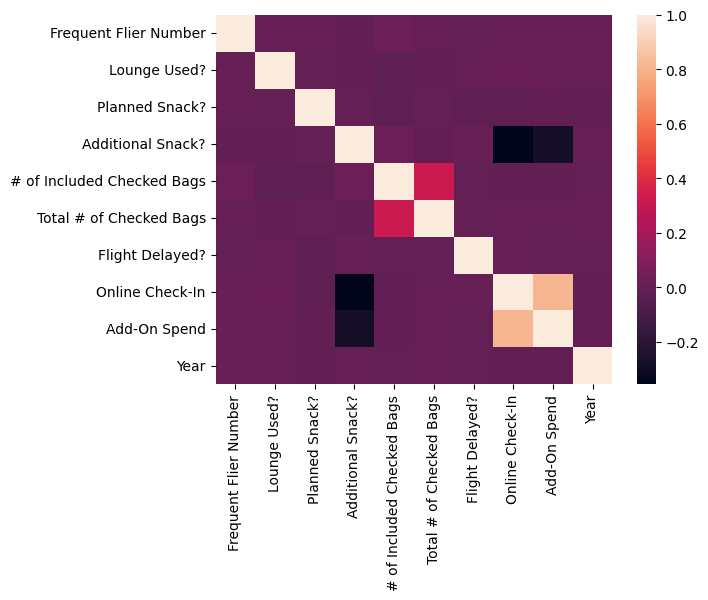

In [ ]:
corrmat = df_frequent_flyer.corr(numeric_only=True)
sns.heatmap(corrmat)

#### Inquiry Type

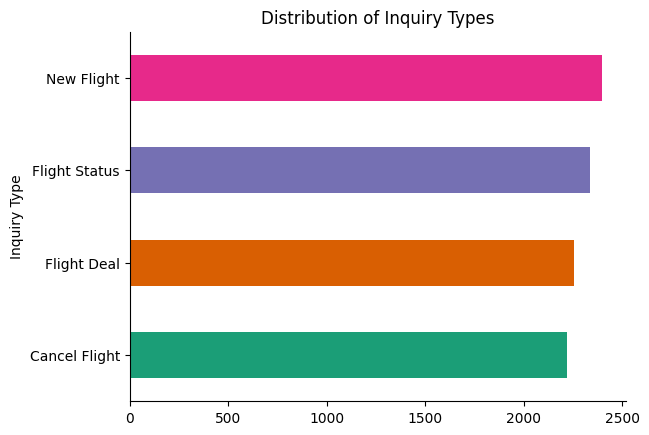

In [ ]:
df_frequent_flyer.groupby('Inquiry Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Distribution of Inquiry Types')
plt.gca().spines[['top', 'right',]].set_visible(False)

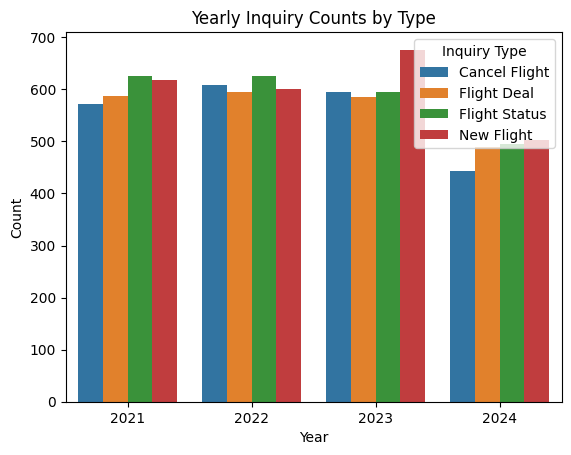

In [ ]:
yearly_inquiry_counts = df_frequent_flyer.groupby(['Year', 'Inquiry Type'])['Frequent Flier Number'].count().reset_index(name='Count')
sns.barplot(data=yearly_inquiry_counts, x='Year', y='Count', hue='Inquiry Type')
plt.title('Yearly Inquiry Counts by Type')
plt.show()

#### Flight Status

Flight Status Trends:
flight_status
Delayed      3511
On-time      3481
Cancelled    2219
Name: count, dtype: int64


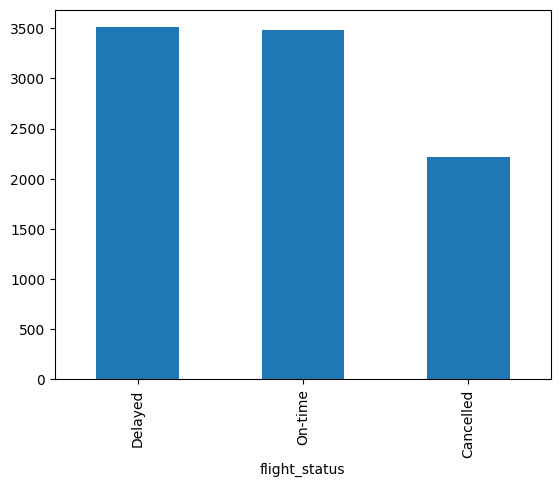

In [ ]:
flight_status_trends = df_frequent_flyer['flight_status'].value_counts()
print("Flight Status Trends:")
print(flight_status_trends)
flight_status_trends.plot(kind='bar')
plt.show()

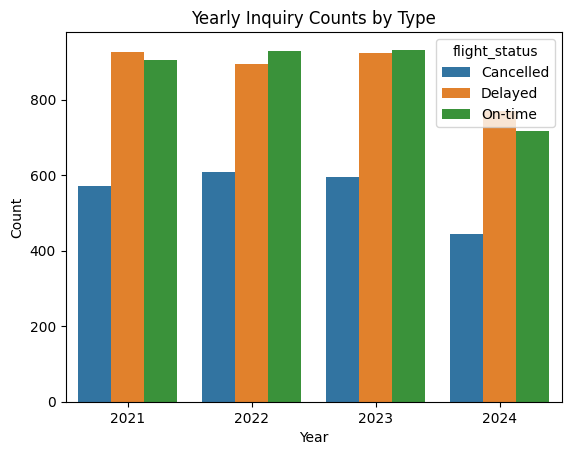

In [ ]:
yearly_inquiry_counts = df_frequent_flyer.groupby(['Year', 'flight_status'])['Most Recent Flight #'].count().reset_index(name='Count')
sns.barplot(data=yearly_inquiry_counts, x='Year', y='Count', hue='flight_status')
plt.title('Yearly Inquiry Counts by Type')
plt.show()

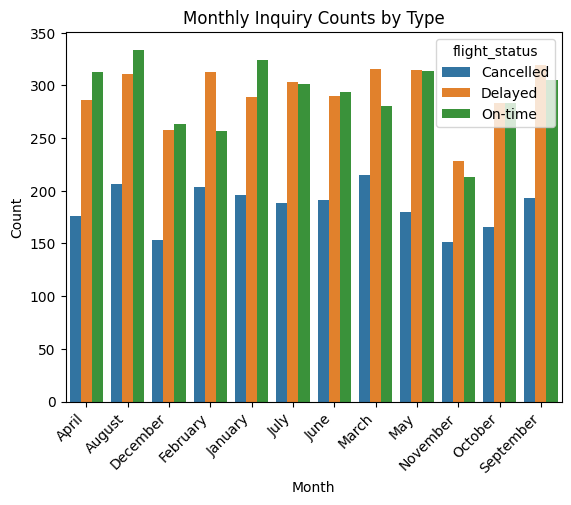

In [ ]:
monthly_inquiry_counts = df_frequent_flyer.groupby(['Month', 'flight_status'])['Most Recent Flight #'].count().reset_index(name='Count')
sns.barplot(data=monthly_inquiry_counts, x='Month', y='Count', hue='flight_status')
plt.title('Monthly Inquiry Counts by Type')
plt.xticks(rotation=45, ha='right')
plt.show()

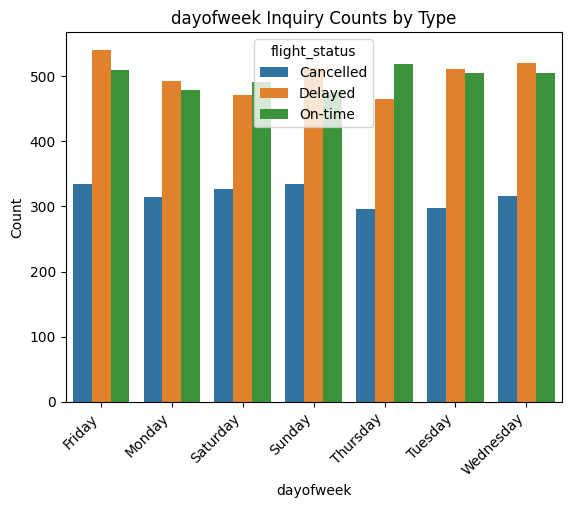

In [ ]:
dayofweek_inquiry_counts = df_frequent_flyer.groupby(['dayofweek', 'flight_status'])['Most Recent Flight #'].count().reset_index(name='Count')
sns.barplot(data=dayofweek_inquiry_counts, x='dayofweek', y='Count', hue='flight_status')
plt.title('dayofweek Inquiry Counts by Type')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Lounge Used?

In [ ]:
# 2. Lounge Usage Patterns
lounge_usage = df_frequent_flyer.groupby('Lounge Used?').size()
print("\nLounge Usage Patterns:")
print(lounge_usage)



Lounge Usage Patterns:
Lounge Used?
False    4575
True     4636
dtype: int64


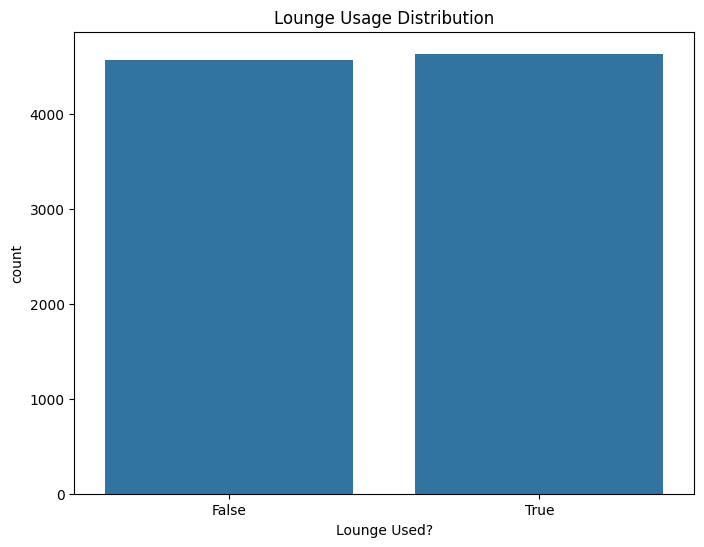

In [ ]:
# Lounge Usage Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_frequent_flyer, x='Lounge Used?')
plt.title('Lounge Usage Distribution')
plt.show()

#### Planned Snack?

#### Additional Snack?

#### Included Checked Bags

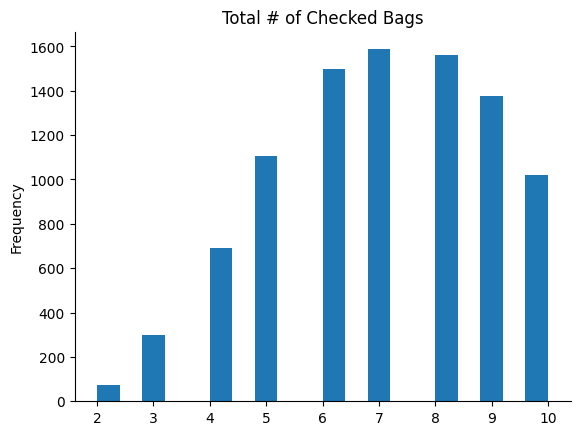

In [ ]:
df_frequent_flyer['Total # of Checked Bags'].plot(kind='hist', bins=20, title='Total # of Checked Bags')
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Lead Source

In [ ]:
sns.catplot(x='Sex',y='Survived',data=df_frequent_flyer,kind='bar',hue='Pclass')
df_frequent_flyer['Age'].plot.hist()
g = sns.FacetGrid(df_frequent_flyer, row='Survived',col='Pclass')
g.map(plt.hist, 'Age', bins=20)


> ### sheet 2

In [ ]:
df_upcoming_flights.head()

,Join Date,Frequent Flier Number,First Name,Last Name,Flight Number,Flight Date,Departing City,Arrival City,Departure Time,Departure Time Zone,...,Year,Day,Day of Week,Currency,Hotel Addon Price,Car Rental Price,Cost Price,Hotel Addon USD,Car Rental USD,Cost USD
0,1988-07-08,7234617746,Debbie,Spears,DL1408,2025-04-14,Houston,London,1900-01-01 09:38:00,CST,...,2025,14,Monday,USD,195.49,210.53,613.83,260.0017,280.0049,816.3939
1,1988-07-08,7234617746,Debbie,Spears,DL3882,2025-04-29,Boston,Dubai,1900-01-01 02:38:00,MST,...,2025,29,Tuesday,AUD,323.60,51.58,741.10,436.8600,69.6330,1000.4850
2,1988-07-08,7234617746,Debbie,Spears,DL4173,2024-10-05,Dubai,Toronto,1900-01-01 09:38:00,UTC,...,2024,5,Saturday,AUD,369.05,151.44,191.79,498.2175,204.4440,258.9165
3,1988-07-08,7234617746,Debbie,Spears,DL8231,2025-04-30,Atlanta,Boston,1900-01-01 00:38:00,PST,...,2025,30,Wednesday,USD,111.11,164.58,515.74,147.7763,218.8914,685.9342
4,1988-07-08,7234617746,Debbie,Spears,DL9014,2025-08-31,Sydney,New York,1900-01-01 22:38:00,UTC,...,2025,31,Sunday,JPY,128.41,201.22,352.38,147.6715,231.4030,405.2370


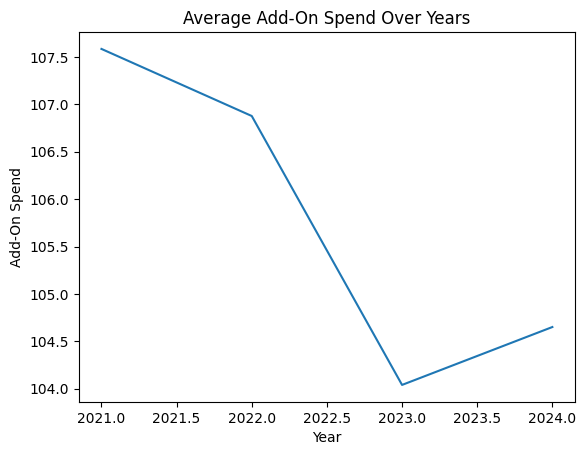

In [ ]:
yearly_spending = df_frequent_flyer.groupby('Year')['Add-On Spend'].mean().reset_index()
sns.lineplot(data=yearly_spending, x='Year', y='Add-On Spend')
plt.title('Average Add-On Spend Over Years')
plt.show()

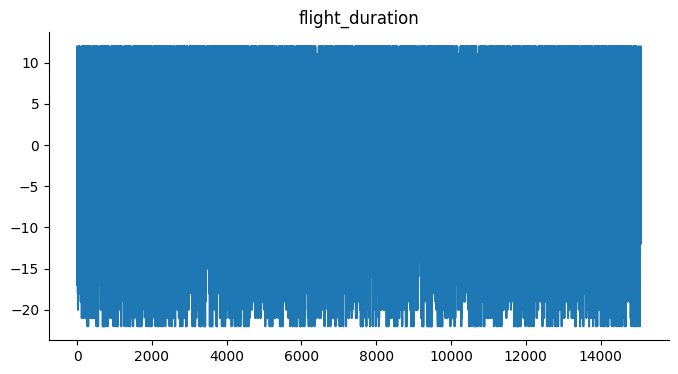

In [ ]:
df_upcoming_flights['flight_duration'].plot(kind='line', figsize=(8, 4), title='flight_duration')
plt.gca().spines[['top', 'right']].set_visible(False)

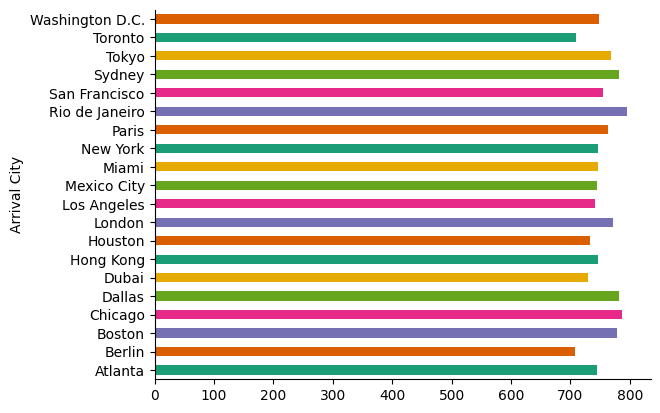

In [ ]:
df_upcoming_flights.groupby('Arrival City').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

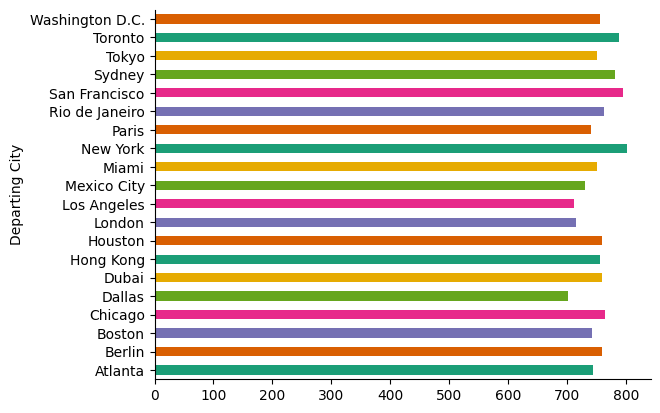

In [ ]:
df_upcoming_flights.groupby('Departing City').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

> ### **Sheet** 3 :

In [ ]:
df_3_month_upcoming.head()

,Flight_ID,Flight Date,Departure City,Arrival City,Departure Time,Arrival Time,Departure Time Zone,Arrival Time Zone,Airline,Flight Number,...,In-Flight Entertainment,Aircraft Type,Loyalty Points Earned,Flight Duration Numeric,Baggage Allowance Numeric,Price Numeric,Month,Year,Day,Day of Week
0,FL22340,2024-09-19,Los Angeles,Miami,10:46:00,16:46:00,PST,MST,Air France,So7354,...,NaN,Airbus A380,1769,10,2,723.52,September,2024,19,Thursday
1,FL33887,2024-09-18,London,Chicago,02:46:00,11:46:00,UTC,CST,Lufthansa,So7520,...,NaN,Boeing 787,1442,4,3,904.40,September,2024,18,Wednesday
2,FL97305,2024-10-19,Miami,Rio de Janeiro,23:46:00,09:46:00,CST,UTC,Southwest,Ai7156,...,Movies,Airbus A320,3956,9,2,1223.54,October,2024,19,Saturday
3,FL74009,2024-09-23,Miami,Chicago,23:46:00,02:46:00,PST,UTC,Air France,Un7843,...,Movies,Airbus A380,1269,8,2,1085.28,September,2024,23,Monday
4,FL89456,2024-10-26,Hong Kong,Miami,05:46:00,14:46:00,UTC,MST,British Airways,Un1561,...,Wi-Fi,Boeing 777,3359,5,1,446.52,October,2024,26,Saturday


<ipython-input-21-b02be3bcf9a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_frequent_flyer, x='Frequent Flier Number', y='Inquiry Type', inner='stick', palette='Dark2')


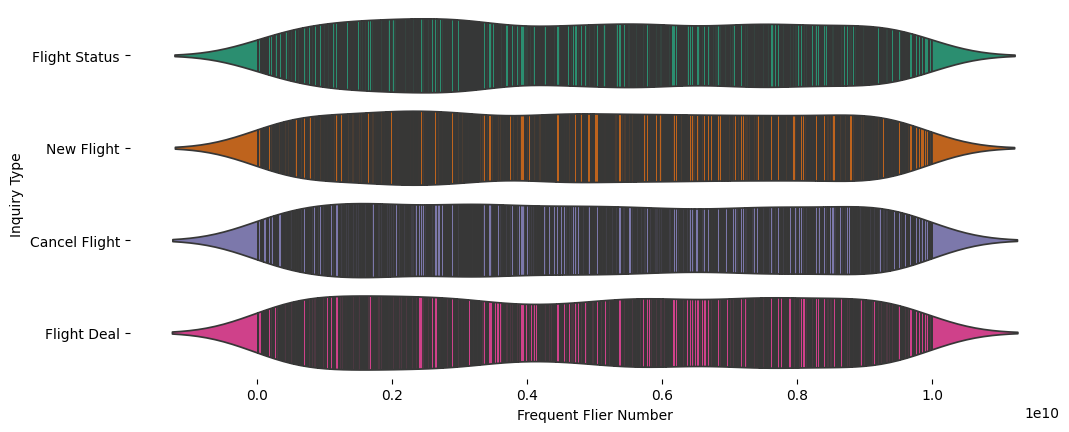

In [ ]:
figsize = (12, 1.2 * len(df_frequent_flyer['Inquiry Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_frequent_flyer, x='Frequent Flier Number', y='Inquiry Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Descriptive Analytics
* Analyze patterns, trends, or anomalies in each dataset
* Apply data aggregation
* Visualize data


## Analyze patterns, trends, or anomalies in each dataset & Apply data aggregation & Visualize data

>  ### Frequent Flyer Data (Dataset 1)

In [ ]:
#Flight Delays
delay_rate = df_frequent_flyer['Flight Delayed?'].mean()
print(f"Flight Delay Rate: {delay_rate:.2f}")

Flight Delay Rate: 0.50


In [ ]:
# 3. Departure and Arrival Airports Trends
airport_pairs = df_frequent_flyer.groupby(['Departing Airport', 'Arrival Airport']).size().reset_index(name='count')
print("\nDeparture and Arrival Airport Pairs Trends:")
print(airport_pairs)



Departure and Arrival Airport Pairs Trends:
    Departing Airport Arrival Airport  count
0                 ATL             BOS     64
1                 ATL             CDG     18
2                 ATL             DEN     63
3                 ATL             DFW     65
4                 ATL             DXB     12
..                ...             ...    ...
243               SYD             ORD     19
244               SYD             SEA     16
245               SYD             SFO     13
246               SYD             SIN      4
247               SYD             SYD      5

[248 rows x 3 columns]


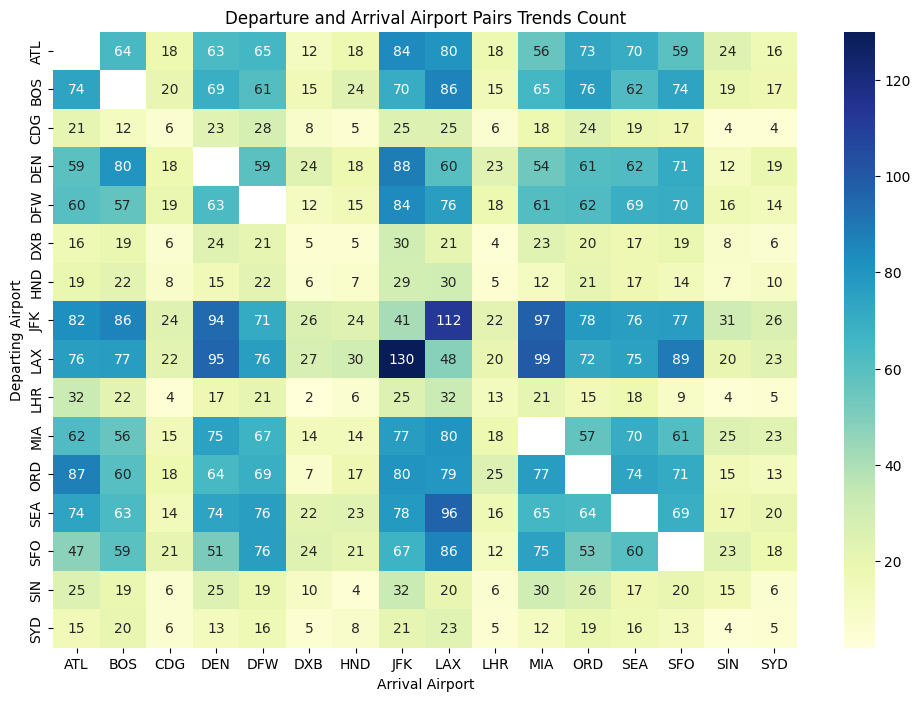

In [ ]:
# Create a pivot table to represent the data for the heatmap
airport_pairs = df_frequent_flyer.groupby(['Departing Airport', 'Arrival Airport'])['Frequent Flier Number'].count().reset_index(name='Count')
airport_pivot = airport_pairs.pivot(index='Departing Airport', columns='Arrival Airport', values='Count')

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(airport_pivot, annot=True, fmt=".0f", cmap="YlGnBu")  # Customize annotation, color map, etc.
plt.title('Departure and Arrival Airport Pairs Trends Count')
plt.show()

In [ ]:
# 4. Flight Delay Patterns
flight_delays = df_frequent_flyer[df_frequent_flyer['Flight Delayed?'] > 0].groupby('Flight Delayed?').size()
print("\nFlight Delay Patterns:")
print(flight_delays)


Flight Delay Patterns:
Flight Delayed?
True    4622
dtype: int64



Lead Source and Online Check-In Patterns:
             Lead Source  Online Check-In  count
0  Corporate Partnership            False   1441
1  Corporate Partnership             True    349
2       Discounted Promo            False   1567
3       Discounted Promo             True    395
4          Online Direct            False   1039
5          Online Direct             True    820
6       Referral Program            False   1439
7       Referral Program             True    369
8          Travel Agency            False   1445
9          Travel Agency             True    347


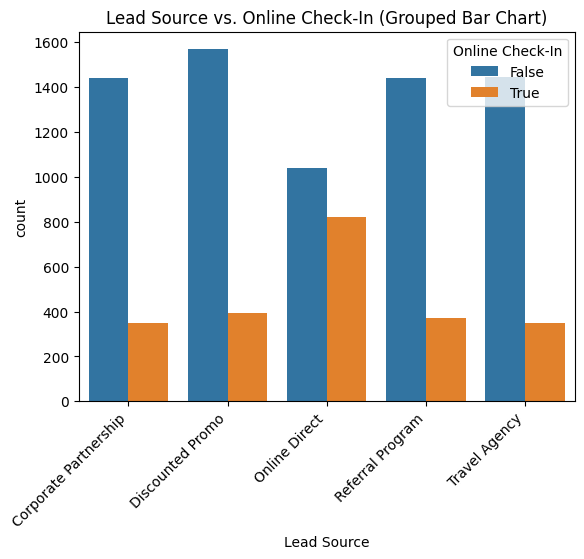

In [ ]:
# 5. Lead Source and Online Check-In
lead_source_online_checkin = df_frequent_flyer.groupby(['Lead Source', 'Online Check-In']).size().reset_index(name='count')
print("\nLead Source and Online Check-In Patterns:")
print(lead_source_online_checkin)


# Grouped bar chart
sns.barplot(data=lead_source_online_checkin, x='Lead Source', y='count', hue='Online Check-In')
plt.title('Lead Source vs. Online Check-In (Grouped Bar Chart)')
plt.xticks(rotation=45, ha='right')
plt.show()

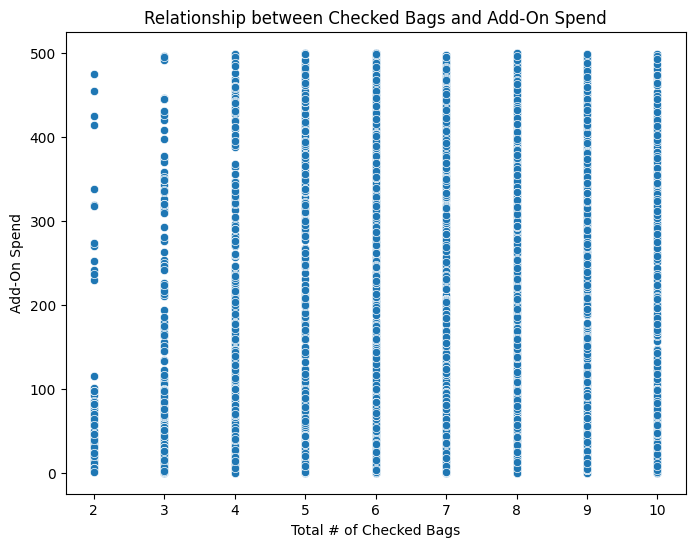

In [ ]:
#Relationship between Checked Bags and Add-On Spend:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_frequent_flyer, x='Total # of Checked Bags', y='Add-On Spend')
plt.title('Relationship between Checked Bags and Add-On Spend')
plt.show()

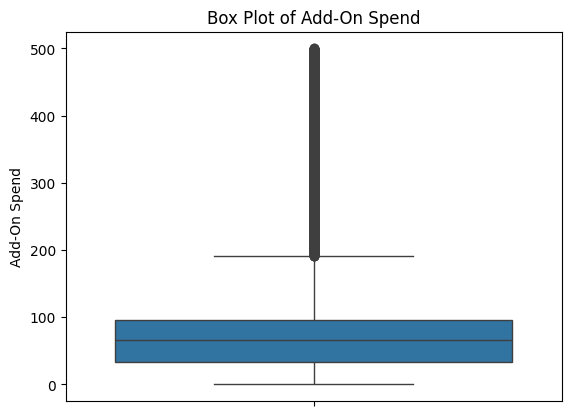

In [ ]:
#Outliers in Add-On Spend:
sns.boxplot(df_frequent_flyer['Add-On Spend'])
plt.title('Box Plot of Add-On Spend')
plt.show()

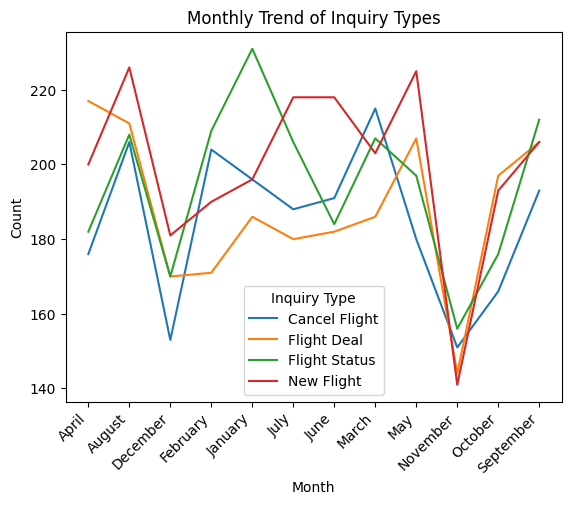

In [ ]:
# Group by month and inquiry type, and count inquiries
monthly_inquiry_trends = df_frequent_flyer.groupby([df_frequent_flyer['Month'], 'Inquiry Type'])['Frequent Flier Number'].count().reset_index(name='Count')

# Visualize with a line chart (or bar chart)
sns.lineplot(data=monthly_inquiry_trends, x='Month', y='Count', hue='Inquiry Type')
plt.title('Monthly Trend of Inquiry Types')
plt.xlabel('Month')
plt.xticks(rotation=45, ha='right')
plt.show()

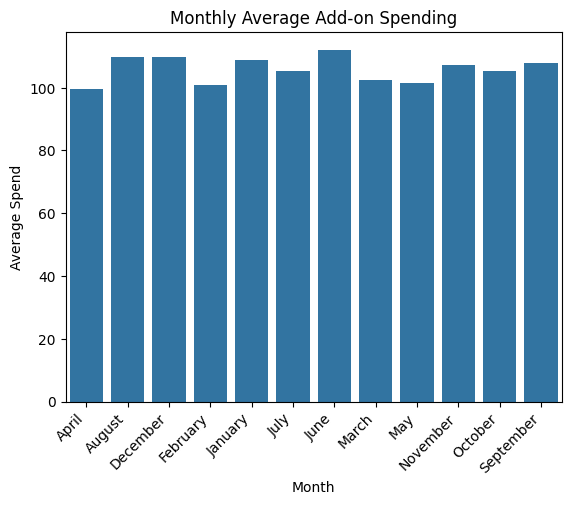

In [ ]:
# Group by month and calculate average add-on spending
monthly_spending = df_frequent_flyer.groupby(df_frequent_flyer['Month'])['Add-On Spend'].mean().reset_index(name='Average Spend')

# Visualize with a bar chart (or line chart)
sns.barplot(data=monthly_spending, x='Month', y='Average Spend')
plt.title('Monthly Average Add-on Spending')
plt.xlabel('Month')
plt.xticks(rotation=45, ha='right')
plt.show()

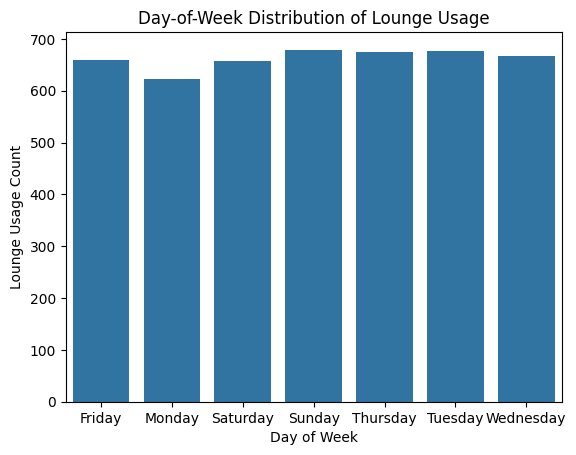

In [ ]:
# Group by day of the week and count lounge usage
dayofweek_lounge_usage = df_frequent_flyer.groupby(df_frequent_flyer['dayofweek'])['Lounge Used?'].sum().reset_index(name='Lounge Usage Count')

# Visualize with a bar chart
sns.barplot(data=dayofweek_lounge_usage, x='dayofweek', y='Lounge Usage Count')
plt.title('Day-of-Week Distribution of Lounge Usage')
plt.xlabel('Day of Week')
plt.show()

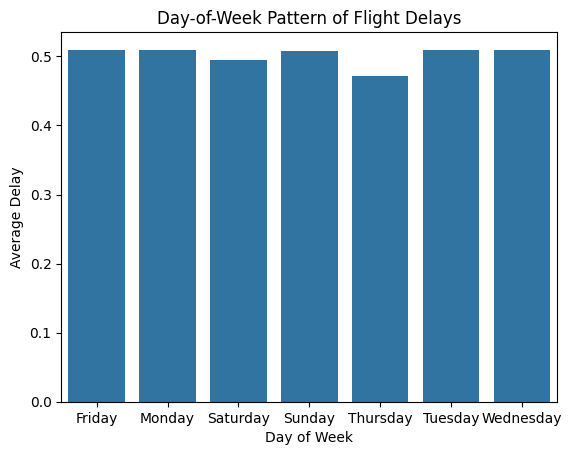

In [ ]:
# Group by day of the week and calculate average flight delay
dayofweek_delays = df_frequent_flyer.groupby(df_frequent_flyer['dayofweek'])['Flight Delayed?'].mean().reset_index(name='Average Delay')

# Visualize with a bar chart (or line chart)
sns.barplot(data=dayofweek_delays, x='dayofweek', y='Average Delay')
plt.title('Day-of-Week Pattern of Flight Delays')
plt.xlabel('Day of Week')
plt.show()

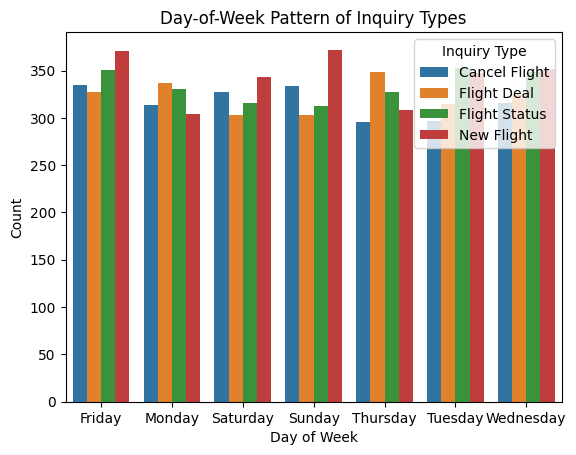

In [ ]:
# Group by day of the week and calculate and count inquiries
dayofweek_inquiries = df_frequent_flyer.groupby([df_frequent_flyer['dayofweek'] , 'Inquiry Type'])['Frequent Flier Number'].count().reset_index(name='Count')

# Visualize with a bar chart (or line chart)
sns.barplot(data=dayofweek_inquiries, x='dayofweek',  y='Count', hue='Inquiry Type')
plt.title('Day-of-Week Pattern of Inquiry Types')
plt.xlabel('Day of Week')
plt.show()

    Inquiry Type  Average Spend
0  Cancel Flight     104.388472
1    Flight Deal     106.763279
2  Flight Status     106.957241
3     New Flight     105.226583


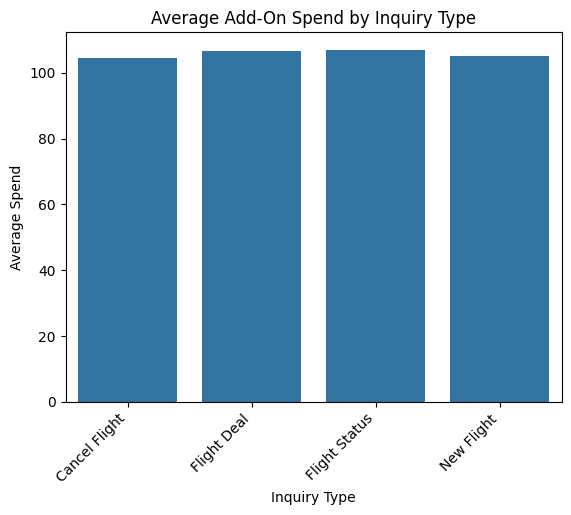

In [ ]:
# Group by 'Inquiry Type' and calculate average 'Add-On Spend'
inquiry_spend = df_frequent_flyer.groupby('Inquiry Type')['Add-On Spend'].mean().reset_index(name='Average Spend')

# Print the results
print(inquiry_spend)

# Visualize (optional)
sns.barplot(data=inquiry_spend, x='Inquiry Type', y='Average Spend')
plt.title('Average Add-On Spend by Inquiry Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

   Departing Airport  Flight Delay Count
0                ATL                 351
1                BOS                 361
2                CDG                 128
3                DEN                 368
4                DFW                 347
5                DXB                 123
6                HND                 127
7                JFK                 487
8                LAX                 486
9                LHR                 118
10               MIA                 376
11               ORD                 371
12               SEA                 377
13               SFO                 359
14               SIN                 133
15               SYD                 110


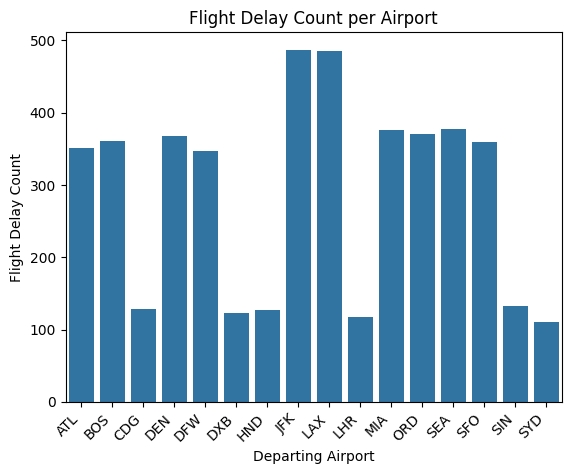

In [ ]:
delay_count_per_airport = df_frequent_flyer[df_frequent_flyer['Flight Delayed?'] > 0].groupby('Departing Airport')['Most Recent Flight #'].count().reset_index(name='Flight Delay Count')
print(delay_count_per_airport)
# Visualize (optional)
sns.barplot(data=delay_count_per_airport, x='Departing Airport', y='Flight Delay Count')
plt.title('Flight Delay Count per Airport')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


Customer Segmentation

In [ ]:
#Customer Segmentation Based on Inquiry Type
# Group by 'Frequent Flier Number' and 'Inquiry Type', then count occurrences
customer_inquiry_counts = df_frequent_flyer.groupby(['Name', 'Inquiry Type'])['Record Creation Date'].count().reset_index(name='Count')

# Pivot the table for easier analysis (optional)
customer_inquiry_pivot = customer_inquiry_counts.pivot(index='Name', columns='Inquiry Type', values='Count').fillna(0)

# Print or visualize the results (e.g., heatmap, bar charts)
print(customer_inquiry_pivot)

Inquiry Type       Cancel Flight  Flight Deal  Flight Status  New Flight
Name                                                                    
Aaron Austin                 0.0          2.0            0.0         2.0
Aaron Chang                  0.0          3.0            1.0         1.0
Aaron Chase                  0.0          1.0            2.0         1.0
Aaron Gutierrez              2.0          2.0            0.0         0.0
Aaron Morales                1.0          1.0            0.0         1.0
...                          ...          ...            ...         ...
Zachary Anderson             0.0          2.0            2.0         1.0
Zachary Blackwell            0.0          0.0            2.0         1.0
Zachary Griffin              2.0          2.0            1.0         0.0
Zachary Harris               0.0          0.0            3.0         2.0
Zachary Williams             1.0          1.0            2.0         1.0

[1956 rows x 4 columns]


In [ ]:
avg_delay_per_customer = df_frequent_flyer.groupby('Name')['Flight Delayed?'].mean()
print(avg_delay_per_customer)


Name
Aaron Austin         0.500000
Aaron Chang          0.200000
Aaron Chase          0.000000
Aaron Gutierrez      0.250000
Aaron Morales        0.666667
                       ...   
Zachary Anderson     0.800000
Zachary Blackwell    1.000000
Zachary Griffin      0.600000
Zachary Harris       0.800000
Zachary Williams     0.200000
Name: Flight Delayed?, Length: 1956, dtype: float64


In [ ]:
# Get top 10 customers for a specific inquiry type (e.g., 'Cancel Flight')
top_10_booking = customer_inquiry_pivot['Cancel Flight'].nlargest(10).index.tolist()

# Retrieve first and last names for the top 10 customers
top_10_booking_details = df_frequent_flyer[df_frequent_flyer['Name'].isin(top_10_booking)][['Frequent Flier Number', 'First Name', 'Last Name']].drop_duplicates()

# Print the results
print(top_10_booking_details)

      Frequent Flier Number First Name Last Name
2121             1431131956      Jacob    Cooper
3209             1118843483    Michael    Harris
4062              127767748       Paul    Harris
4334             2236939144      Julia  Hamilton
4344             7517632135      Marie   Barajas
5704             1607636482    Michael     Brown
5918             5619225023      Linda     Cross
6530             8966526258     Denise    Morris
6930             3651930353  Katherine  Reynolds
6975               95960141    Michael     Brown
7771             3169400967     Nicole      Duke
8429              165280232    Michael     Brown
8943             4956848043    Michael     Brown


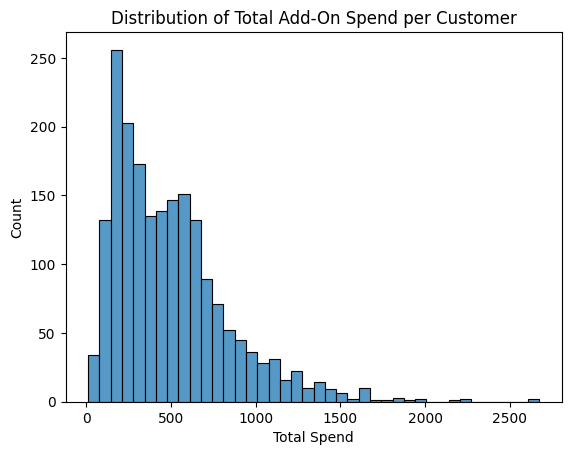

In [ ]:
# Customer Spending Habits:
# Group by 'Frequent Flier Number' and calculate total add-on spend
customer_spend = df_frequent_flyer.groupby('Name')['Add-On Spend'].sum().reset_index(name='Total Spend')

# Analyze the distribution of total spend (e.g., histogram, box plot)
sns.histplot(customer_spend['Total Spend'])
plt.title('Distribution of Total Add-On Spend per Customer')
plt.show()

In [ ]:
# Get top 10 customers by total spend
top_10_spend = customer_spend.nlargest(10, 'Total Spend')['Name'].tolist()

# Retrieve first and last names
top_10_spend_details = df_frequent_flyer[df_frequent_flyer['Name'].isin(top_10_spend)][['Frequent Flier Number', 'First Name', 'Last Name']].drop_duplicates()

# Print the results
print(top_10_spend_details)

      Frequent Flier Number   First Name Last Name
1395             6472765553       Justin     Scott
1436             8116463709      Anthony  Anderson
2020             2477353734     Samantha   Donovan
3408             1761981700         Ryan  Villegas
4305             6912440530      Kenneth    Carter
5704             1607636482      Michael     Brown
6496              588005929        Jason   Calhoun
6975               95960141      Michael     Brown
7470             8319828410      Anthony  Anderson
8429              165280232      Michael     Brown
8476             9012245651      Barbara     Moore
8715             4409832705  Christopher       Kim
8943             4956848043      Michael     Brown
9098             9234286854      William   Rosario


In [ ]:
# Flight Delay Experience
# Group by 'Frequent Flier Number' and calculate average flight delay
customer_delay = df_frequent_flyer.groupby('Name')['Flight Delayed?'].mean().reset_index(name='Average Delay')

# Identify customers with frequent delays (e.g., above a certain threshold)
frequent_delay_customers = customer_delay[customer_delay['Average Delay'] > 0.5]  # Example: average delay > 0.5

# Print or visualize the results
print(frequent_delay_customers)

                   Name  Average Delay
4         Aaron Morales       0.666667
5           Aaron Weeks       0.750000
7          Abigail Dean       0.666667
8          Abigail Reed       0.600000
9             Adam Hall       0.750000
...                 ...            ...
1947      William Short       0.600000
1951   Zachary Anderson       0.800000
1952  Zachary Blackwell       1.000000
1953    Zachary Griffin       0.600000
1954     Zachary Harris       0.800000

[835 rows x 2 columns]


In [ ]:
# ... (previous code for customer_delay) ...

# Get top 10 customers by average delay
top_10_delay = customer_delay.nlargest(10, 'Average Delay')['Name'].tolist()

# Retrieve first and last names
top_10_delay_details = df_frequent_flyer[df_frequent_flyer['Name'].isin(top_10_delay)][['Frequent Flier Number', 'First Name', 'Last Name']].drop_duplicates()

# Print the results
print(top_10_delay_details)

      Frequent Flier Number First Name   Last Name
550              4073890575      April       Sloan
1385             7284311522     Alisha     Carroll
2035             5112190939       Adam      Miller
2251             4167272310    Anthony         Ray
4329             5230275328     Andrew       Myers
5469             8508787810        Ann     Sanders
5898             6539084335       Bill      Bailey
6516             1359319195      April    Stafford
7177             2324891223  Alexandra       Owens
7585             3893695567       Anna  Washington


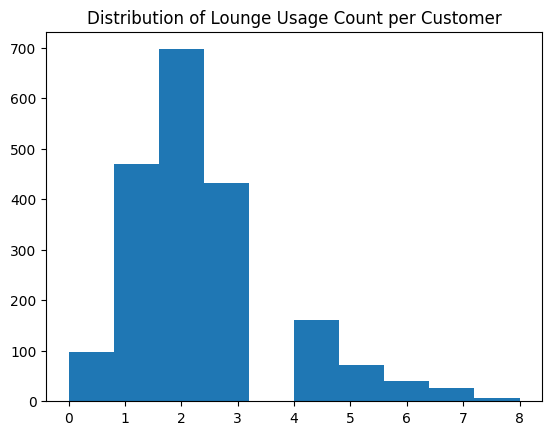

In [ ]:
#Lounge Usage Patterns
# Group by 'Frequent Flier Number' and count lounge usage
customer_lounge_usage = df_frequent_flyer.groupby('Frequent Flier Number')['Lounge Used?'].sum().reset_index(name='Lounge Usage Count')

# Analyze the distribution of lounge usage (e.g., histogram)
plt.hist(customer_lounge_usage['Lounge Usage Count'], bins=10)
plt.title('Distribution of Lounge Usage Count per Customer')
plt.show()

In [ ]:
# ... (previous code for customer_lounge_usage) ...

# Get top 10 customers by lounge usage count
top_10_lounge = customer_lounge_usage.nlargest(10, 'Lounge Usage Count')['Frequent Flier Number'].tolist()

# Retrieve first and last names
top_10_lounge_details = df_frequent_flyer[df_frequent_flyer['Frequent Flier Number'].isin(top_10_lounge)][['Frequent Flier Number', 'First Name', 'Last Name']].drop_duplicates()

# Print the results
print(top_10_lounge_details)

      Frequent Flier Number First Name Last Name
622              9415873701      Julie   Salazar
1663              150238837      Corey    Garcia
1768             9044476163     Thomas   Jenkins
1986              838008602    Rebecca   Donovan
3026             1107077278       Mary     Hayes
3668             8611896383       Brad   Johnson
4576             1061204931    William  Davidson
5439              953347633       John  Martinez
5918             5619225023      Linda     Cross
9144              331613191     Sandra     Wells


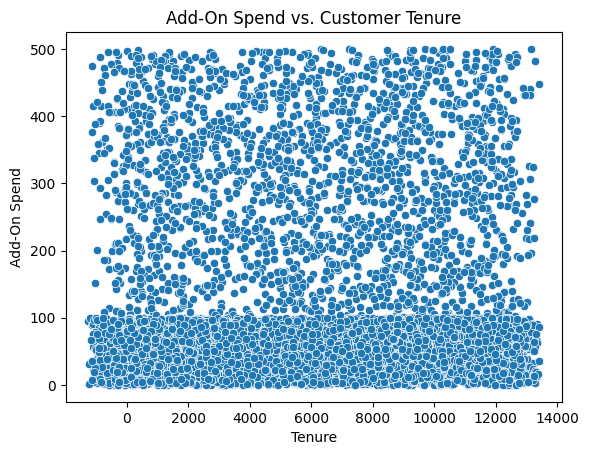

In [ ]:
#Customer Tenure and Behavior:
# Analyze trends in spending or other metrics based on tenure
sns.scatterplot(data=df_frequent_flyer, x='Tenure', y='Add-On Spend')
plt.title('Add-On Spend vs. Customer Tenure')
plt.show()

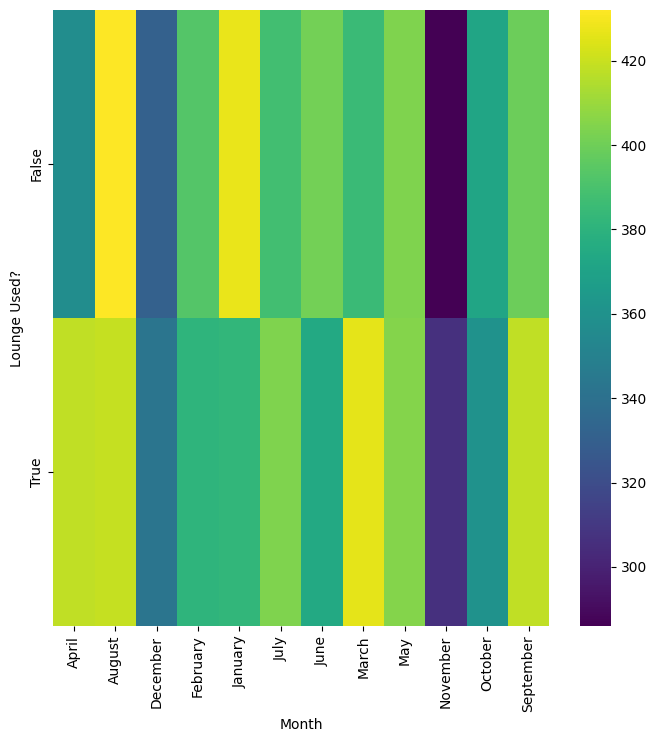

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Lounge Used?'].value_counts()
    for x_label, grp in df_frequent_flyer.groupby('Month')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Month')
_ = plt.ylabel('Lounge Used?')

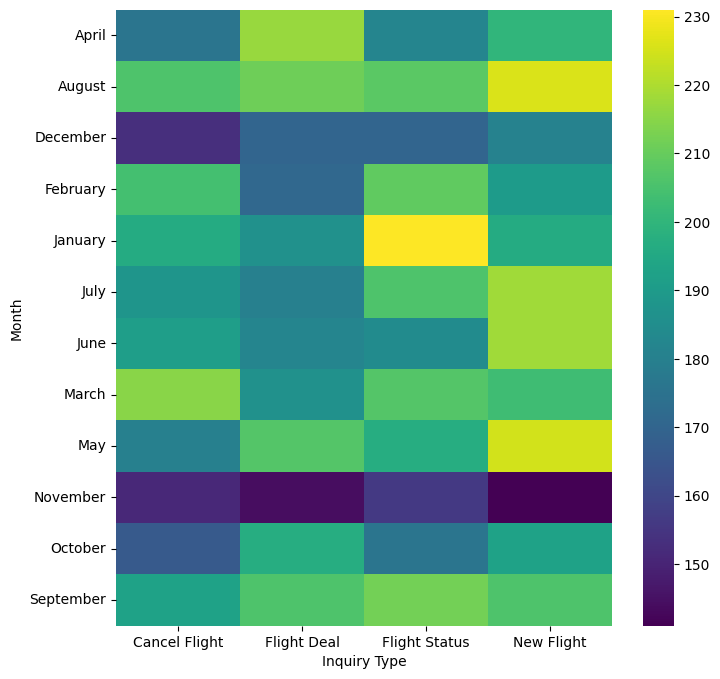

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Month'].value_counts()
    for x_label, grp in df_frequent_flyer.groupby('Inquiry Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Inquiry Type')
_ = plt.ylabel('Month')

Planned Snack? , Additional Snack? , Lead Source , Online Check-In , Add-On Spend,

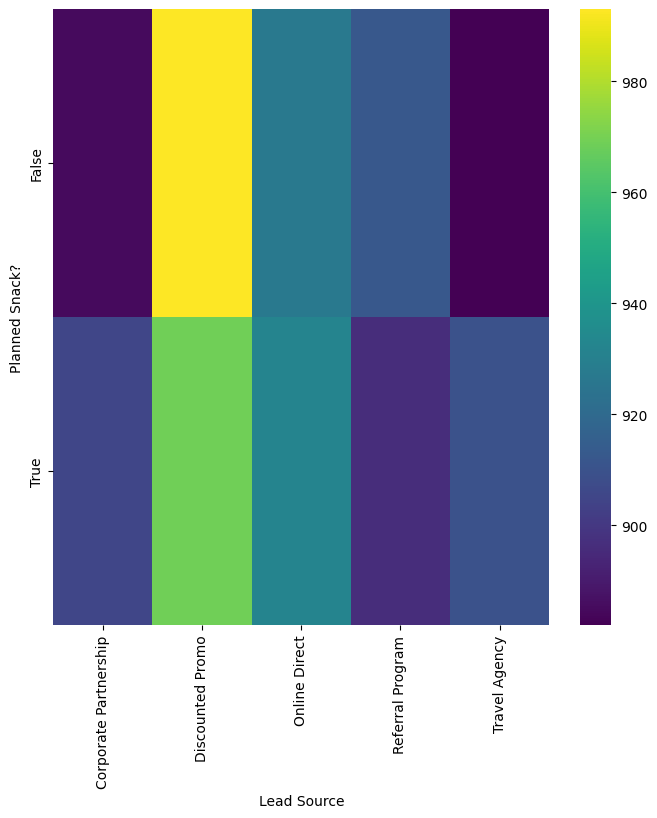

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Planned Snack?'].value_counts()
    for x_label, grp in df_frequent_flyer.groupby('Lead Source')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Lead Source')
_ = plt.ylabel('Planned Snack?')

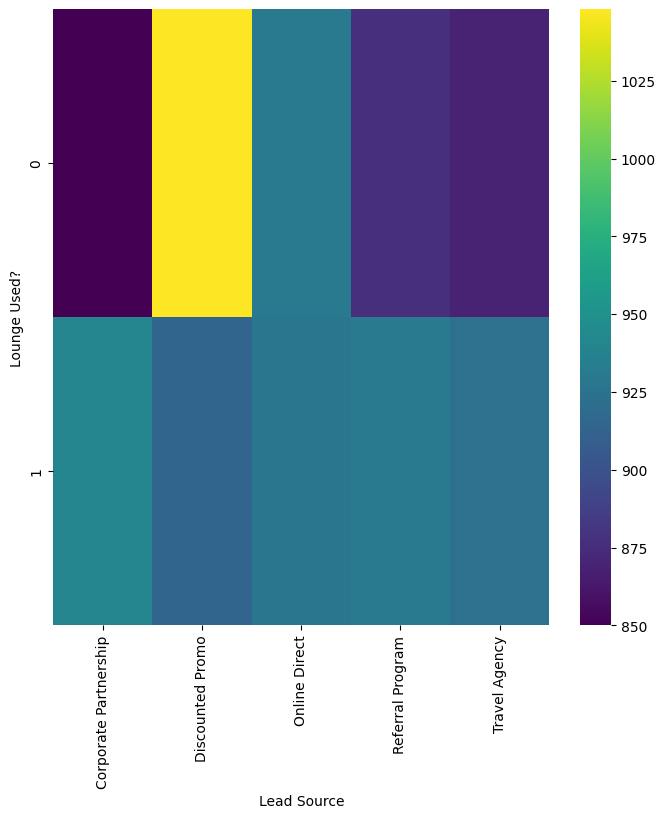

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Lounge Used?'].value_counts()
    for x_label, grp in df_frequent_flyer.groupby('Lead Source')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Lead Source')
_ = plt.ylabel('Lounge Used?')

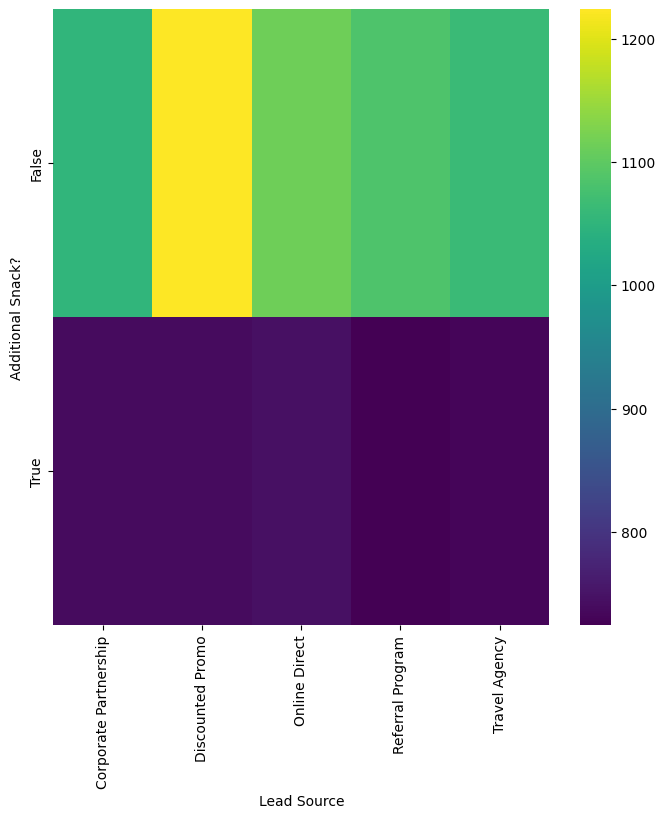

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Additional Snack?'].value_counts()
    for x_label, grp in df_frequent_flyer.groupby('Lead Source')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Lead Source')
_ = plt.ylabel('Additional Snack?')

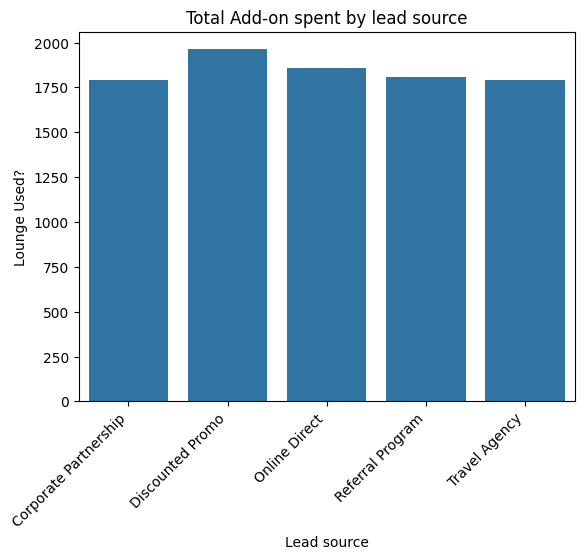

In [ ]:
# Group by day of the week and calculate and count inquiries
add_onspend_lead = df_frequent_flyer.groupby('Lead Source')['Lounge Used?'].count().reset_index()


# Visualize with a bar chart (or line chart)
sns.barplot(data=add_onspend_lead, x='Lead Source',  y='Lounge Used?')
plt.title('Total Add-on spent by lead source')
plt.xlabel('Lead source')
plt.xticks(rotation=45, ha='right')
plt.show()

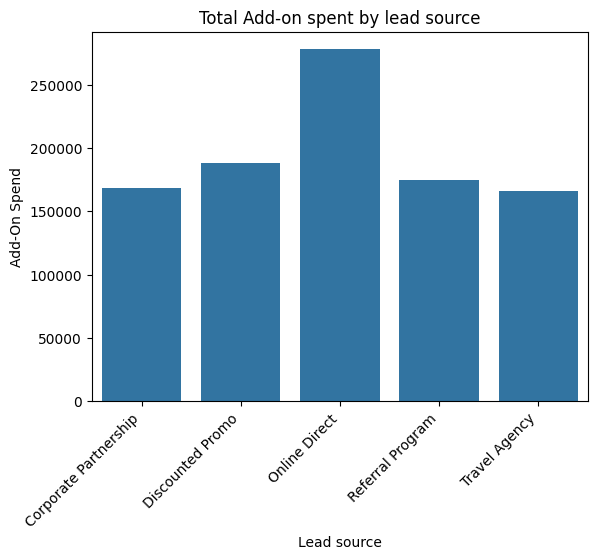

In [ ]:
# Group by day of the week and calculate and count inquiries
add_onspend_lead = df_frequent_flyer.groupby('Lead Source')['Add-On Spend'].sum().reset_index()


# Visualize with a bar chart (or line chart)
sns.barplot(data=add_onspend_lead, x='Lead Source',  y='Add-On Spend')
plt.title('Total Add-on spent by lead source')
plt.xlabel('Lead source')
plt.xticks(rotation=45, ha='right')
plt.show()


> ### Flier Upcoming Flights Data (Dataset 2)

In [ ]:
#Flight Booking Patterns:
#By Flight Number/Route:
flight_counts = df_upcoming_flights['Flight Number'].value_counts()
print(f"Top 5 Most Frequent Flights: \n{flight_counts.head(5)}")

Top 5 Most Frequent Flights: 
Flight Number
DL5200    10
DL3300     8
DL4568     8
DL3617     7
DL1771     7
Name: count, dtype: int64


In [ ]:
departure_city_counts = df_upcoming_flights['Departing City'].value_counts()
arrival_city_counts = df_upcoming_flights['Arrival City'].value_counts()
print(f"Top 5 Departure Cities: \n{departure_city_counts.head(5)}")
print(f"\nTop 5 Arrival Cities: \n{arrival_city_counts.head(5)}")

Top 5 Departure Cities: 
Departing City
New York         802
San Francisco    795
Toronto          788
Sydney           782
Chicago          764
Name: count, dtype: int64

Top 5 Arrival Cities: 
Arrival City
Rio de Janeiro    795
Chicago           787
Dallas            782
Sydney            781
Boston            778
Name: count, dtype: int64


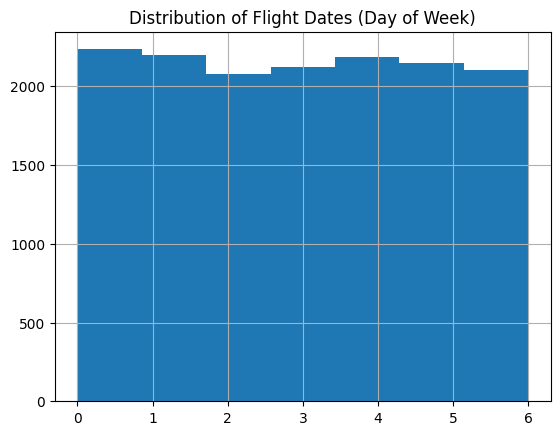

In [ ]:
df_upcoming_flights['Flight Date'].dt.dayofweek.hist(bins=7)
plt.title('Distribution of Flight Dates (Day of Week)')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_upcoming_flights, x='Cost USD', y='Car Rental Addon USD')
plt.title('Correlation between Flight Cost and Car Rental Addon')
plt.show()

ValueError: Could not interpret value `Car Rental Addon USD` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [ ]:
car_rental_rate = df_upcoming_flights['Car Rental Addon USD'].astype(bool).mean()
hotel_addon_rate = df_upcoming_flights['Hotel Addon USD'].astype(bool).mean()
print(f"Car Rental Addon Rate: {car_rental_rate:.2f}")
print(f"Hotel Addon Rate: {hotel_addon_rate:.2f}")

In [ ]:
sns.boxplot(df_upcoming_flights['Cost USD'])
plt.title('Box Plot of Flight Costs')
plt.show()


Booking Trends:
   Flight Date  Booking Count
0      2024-09            863
1      2024-10           1275
2      2024-11           1292
3      2024-12           1262
4      2025-01           1204
5      2025-02           1138
6      2025-03           1259
7      2025-04           1292
8      2025-05           1231
9      2025-06           1197
10     2025-07           1350
11     2025-08           1319
12     2025-09            396


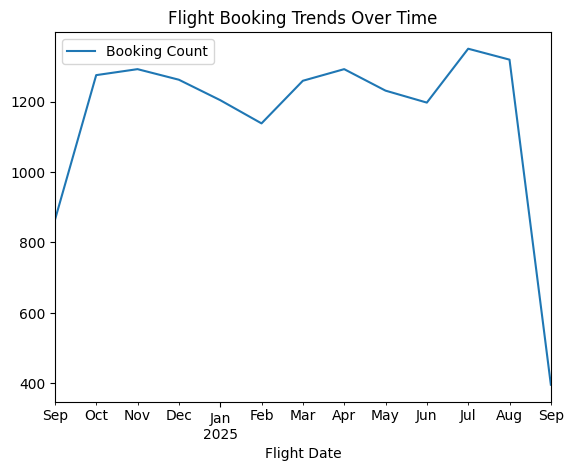

In [ ]:
#Flight Booking Trends over Time
bookings_over_time = df_upcoming_flights.groupby(df_upcoming_flights['Flight Date'].dt.to_period('M'))['Frequent Flier Number'].count().reset_index(name='Booking Count')
print("\nBooking Trends:")
print(bookings_over_time)
bookings_over_time.plot(kind='line', x='Flight Date', y='Booking Count')
plt.title('Flight Booking Trends Over Time')
plt.show()


In [ ]:
# 2. Flight Date and Time Patterns
df_upcoming_flights['Month'] = df_upcoming_flights['Flight Date'].dt.month
df_upcoming_flights['Year'] = df_upcoming_flights['Flight Date'].dt.year

In [ ]:
# Convert 'Departure Time' and 'Arrival Time' to datetime objects with time zones
# Handle cases with ambiguous time formats using format='mixed'
df_upcoming_flights['Departure Time'] = pd.to_datetime(df_upcoming_flights['Departure Time'], format='%H:%M:%S', errors='coerce')
df_upcoming_flights['Arrival Time'] = pd.to_datetime(df_upcoming_flights['Arrival Time'], format='%H:%M:%S', errors='coerce')

# Create new columns for departure and arrival times in UTC
df_upcoming_flights['Departure Time UTC'] = df_upcoming_flights['Departure Time'].dt.tz_localize('UTC')
df_upcoming_flights['Arrival Time UTC'] = df_upcoming_flights['Arrival Time'].dt.tz_localize('UTC')

# Calculate flight duration using UTC times
df_upcoming_flights['flight_duration'] = (df_upcoming_flights['Arrival Time UTC'] - df_upcoming_flights['Departure Time UTC']).dt.total_seconds() / 3600  # Duration in hour

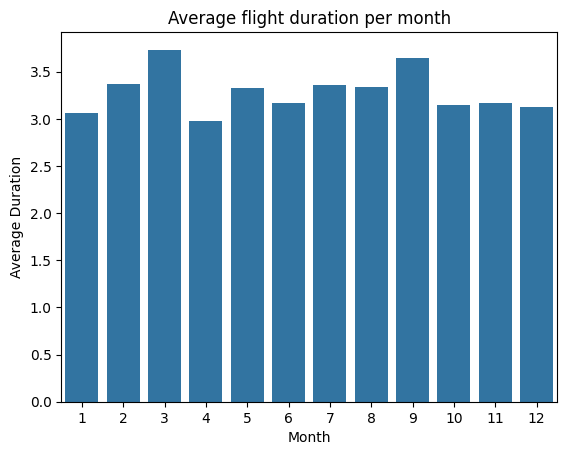

In [ ]:
# Average flight duration per month
avg_duration_monthly = df_upcoming_flights.groupby(['Month'])['flight_duration'].mean().reset_index(name='Average Duration')

# Visualize with a bar chart (or line chart)
sns.barplot(data=avg_duration_monthly, x='Month', y='Average Duration')
plt.title('Average flight duration per month')
plt.xlabel('Month')
plt.show()

In [ ]:
# Monthly flight counts
monthly_flights = df_upcoming_flights.groupby(['Year', 'Month'])['Flight Date'].count().reset_index(name='Flight Count')

# Average flight duration per month
avg_duration_monthly = df_upcoming_flights.groupby(['Year', 'Month'])['flight_duration'].mean().reset_index(name='Average Duration')

# Total add-on spend per month
total_spend_monthly = df_upcoming_flights.groupby(['Year', 'Month'])['Hotel Addon $'].sum().reset_index(name='Total Spend')


Flight Date and Time Patterns:
Flight Date
0    2235
1    2198
2    2078
3    2123
4    2188
5    2151
6    2105
dtype: int64


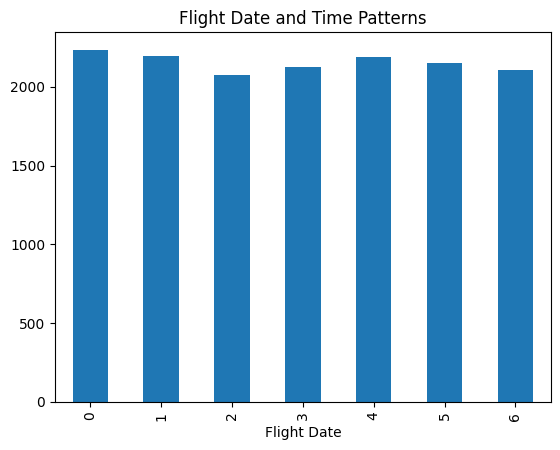

In [ ]:
df_upcoming_flights['Flight Date'] = pd.to_datetime(df_upcoming_flights['Flight Date'])
flight_date_time_patterns = df_upcoming_flights.groupby(df_upcoming_flights['Flight Date'].dt.dayofweek).size()
print("\nFlight Date and Time Patterns:")
print(flight_date_time_patterns)
flight_date_time_patterns.plot(kind='bar')
plt.title('Flight Date and Time Patterns')
plt.show()

In [ ]:
# 3. City and Destinations
city_destinations = df_upcoming_flights.groupby(['Departing City', 'Arrival City']).size().reset_index(name='count')
print("\City and Destinations Patterns:")
print(city_destinations)

\City and Destinations Patterns:
      Departing City    Arrival City  count
0            Atlanta          Berlin     37
1            Atlanta          Boston     43
2            Atlanta         Chicago     36
3            Atlanta          Dallas     38
4            Atlanta           Dubai     42
..               ...             ...    ...
375  Washington D.C.  Rio de Janeiro     41
376  Washington D.C.   San Francisco     44
377  Washington D.C.          Sydney     32
378  Washington D.C.           Tokyo     35
379  Washington D.C.         Toronto     32

[380 rows x 3 columns]


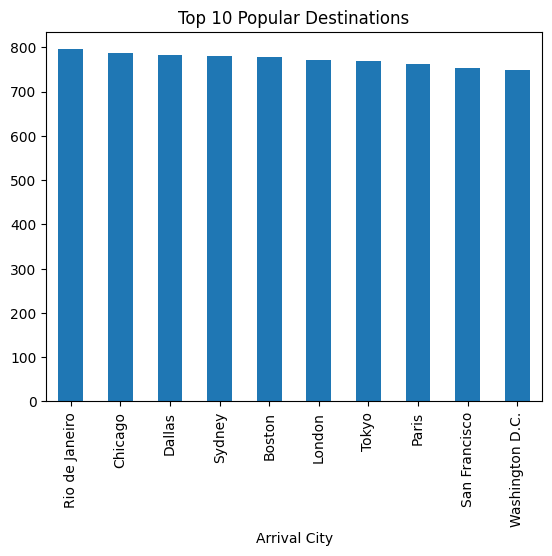

In [ ]:
#Popular Destinations

popular_destinations = df_upcoming_flights['Arrival City'].value_counts().head(10)
popular_destinations.plot(kind='bar')
plt.title('Top 10 Popular Destinations')
plt.show()

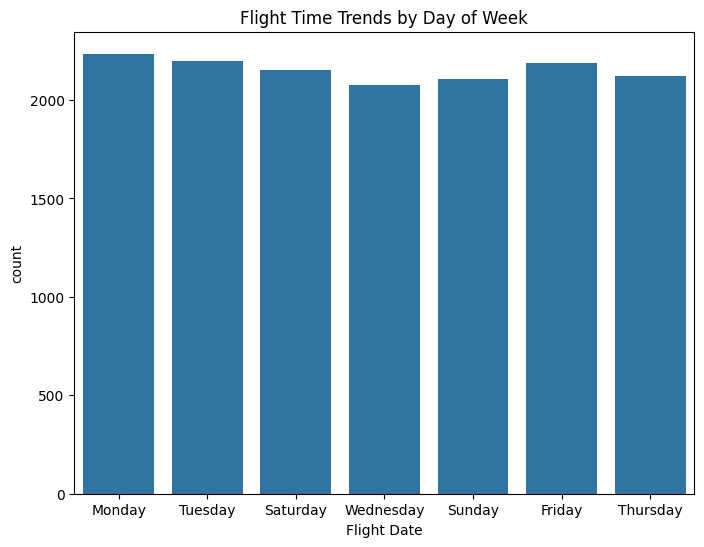

In [ ]:
# Flight Time (Day of Week) Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_upcoming_flights, x=df_upcoming_flights['Flight Date'].dt.day_name())
plt.title('Flight Time Trends by Day of Week')
plt.show()

In [ ]:
df_upcoming_flights['Name'] = df_upcoming_flights['First Name'] + ' ' + df_upcoming_flights['Last Name']

In [ ]:
frequent_travelers = df_upcoming_flights['Name'].value_counts().head(10)
print(f"Top 10 Frequent Travelers: \n{frequent_travelers}")

Top 10 Frequent Travelers: 
Name
Michael Brown      29
Joshua Roberts     20
Kenneth Johnson    20
Alicia Brown       19
Lisa Morales       19
Ryan Miller        19
William Murray     18
Matthew Davis      17
Denise Smith       17
Richard Jones      17
Name: count, dtype: int64


In [ ]:
customer_destinations = df_upcoming_flights.groupby('Name')['Arrival City'].value_counts().reset_index(name='Count')
print(f"Destination Preferences by Customer: \n{customer_destinations}")

Destination Preferences by Customer: 
                   Name    Arrival City  Count
0          Aaron Austin       Hong Kong      2
1          Aaron Austin        New York      2
2          Aaron Austin          Boston      1
3          Aaron Austin     Mexico City      1
4          Aaron Austin           Paris      1
...                 ...             ...    ...
12619  Zachary Williams        New York      2
12620  Zachary Williams       Hong Kong      1
12621  Zachary Williams           Paris      1
12622  Zachary Williams  Rio de Janeiro      1
12623  Zachary Williams   San Francisco      1

[12624 rows x 3 columns]


In [ ]:
customer_addons = df_upcoming_flights.groupby('Name')[['Car Rental USD', 'Hotel Addon USD']].sum()
print(f"Customer Add-on Purchase Habits: \n{customer_addons}")

Customer Add-on Purchase Habits: 
                   Car Rental USD  Hotel Addon USD
Name                                              
Aaron Austin            1744.6990        3022.7488
Aaron Chang             1223.7733        2372.2581
Aaron Chase             1074.8909        1590.2019
Aaron Gutierrez         1184.3997        2302.4552
Aaron Morales           1398.5558        2496.9108
...                           ...              ...
Zachary Anderson        1402.4492        2524.4493
Zachary Blackwell       1485.0975        2265.8247
Zachary Griffin         1700.3694        2039.2027
Zachary Harris          1485.5954        1904.7093
Zachary Williams        1424.2391        2620.1154

[1956 rows x 2 columns]


In [ ]:
flights_by_dayofweek = df_upcoming_flights['Flight Date'].dt.dayofweek.value_counts()
print(f"Flight Frequency by Day of Week: \n{flights_by_dayofweek}")

Flight Frequency by Day of Week: 
Flight Date
0    2235
1    2198
4    2188
5    2151
3    2123
6    2105
2    2078
Name: count, dtype: int64


In [ ]:
avg_duration_by_dayofweek = df_upcoming_flights.groupby(df_upcoming_flights['Flight Date'].dt.dayofweek)['flight_duration'].mean()
print(f"Average Flight Duration by Day of Week: \n{avg_duration_by_dayofweek}")

Average Flight Duration by Day of Week: 
Flight Date
0    3.502461
1    2.987261
2    3.089990
3    3.330193
4    3.689671
5    3.105532
6    3.267933
Name: flight_duration, dtype: float64


In [ ]:
avg_cost_by_dayofweek = df_upcoming_flights.groupby(df_upcoming_flights['Flight Date'].dt.dayofweek)['Cost USD'].mean()
print(f"Average Cost by Day of Week: \n{avg_cost_by_dayofweek}")

Average Cost by Day of Week: 
Flight Date
0    618.406438
1    617.610575
2    618.377541
3    633.672480
4    624.384237
5    610.892720
6    614.182061
Name: Cost USD, dtype: float64


In [ ]:
flights_by_month = df_upcoming_flights['Flight Date'].dt.month.value_counts()
print(f"Popular Travel Months: \n{flights_by_month}")

Popular Travel Months: 
Flight Date
7     1350
8     1319
4     1292
11    1292
10    1275
12    1262
3     1259
9     1259
5     1231
1     1204
6     1197
2     1138
Name: count, dtype: int64


In [ ]:
avg_cost_by_month = df_upcoming_flights.groupby(df_upcoming_flights['Flight Date'].dt.month)['Cost USD'].mean()
print(f"Average Cost by Month: \n{avg_cost_by_month}")

Average Cost by Month: 
Flight Date
1     620.749914
2     613.246670
3     617.024988
4     618.605771
5     642.630632
6     616.494924
7     629.524288
8     622.437367
9     611.820681
10    614.869431
11    619.295381
12    608.067594
Name: Cost USD, dtype: float64


In [ ]:
car_rental_by_month = df_upcoming_flights.groupby(df_upcoming_flights['Flight Date'].dt.month)['Car Rental USD'].sum()
print(f"Car Rental Add-on Purchases by Month: \n{car_rental_by_month}")

Car Rental Add-on Purchases by Month: 
Flight Date
1     236805.0412
2     221180.0978
3     251589.8358
4     255998.7912
5     252850.6243
6     245013.8099
7     266787.5987
8     267045.7769
9     239207.7351
10    249756.3807
11    253451.2193
12    245371.7000
Name: Car Rental USD, dtype: float64


> ### 3 Month Upcoming Flights Data (Dataset 3)

In [ ]:
# 1. Flight Availability and Bookings
flight_availability = df_3_month_upcoming.groupby('Flight_ID')['Available Seats'].mean()
print("\nFlight Availability and Bookings Patterns:")
print(flight_availability)


Flight Availability and Bookings Patterns:
Flight_ID
FL10009    199.0
FL10032    116.0
FL10034     13.0
FL10037    136.0
FL10047    121.0
           ...  
FL99973    136.0
FL99986    183.0
FL99990     49.0
FL99994    111.0
FL99998     84.0
Name: Available Seats, Length: 17977, dtype: float64


In [ ]:


# Assuming your existing flight duration column is named 'Flight Duration'
df_3_month_upcoming['Flight Duration Numeric'] = df_3_month_upcoming['Flight Duration'].str.extract(r'(\d+)').astype(int)

In [ ]:
# 2. Flight Duration Patterns
flight_duration_patterns = df_3_month_upcoming['Flight Duration Numeric'].describe()
print("\nFlight Duration Patterns:")
print(flight_duration_patterns)


Flight Duration Patterns:
count    20000.000000
mean         8.557350
std          4.032546
min          2.000000
25%          5.000000
50%          9.000000
75%         12.000000
max         15.000000
Name: Flight Duration Numeric, dtype: float64


In [ ]:
# Assuming your existing flight duration column is named 'Flight Duration'
df_3_month_upcoming['Baggage Allowance Numeric'] = df_3_month_upcoming['Baggage Allowance'].str.extract(r'(\d+)').astype(int)

In [ ]:
# 3. Baggage Allowance Trends
baggage_allowance_trends = df_3_month_upcoming['Baggage Allowance Numeric'].value_counts()
print("\nBaggage Allowance Trends:")
print(baggage_allowance_trends)


Baggage Allowance Trends:
Baggage Allowance Numeric
3    6680
2    6674
1    6646
Name: count, dtype: int64


In [ ]:
df_3_month_upcoming['Price Numeric'] = df_3_month_upcoming['Flight Duration'].str.extract(r'(\d+)').astype(float)

In [ ]:
# 4. Flight Price Trends
flight_price_trends = df_3_month_upcoming.groupby('Currency')['Price Numeric'].mean()
print("\nFlight Price Trends by Currency:")
print(flight_price_trends)


Flight Price Trends by Currency:
Currency
AED    10.988229
AUD     6.611397
BRL     8.117148
CAD    11.518689
EUR     6.631171
GBP     8.932118
HKD     5.436923
JPY     8.720934
MXN     4.611559
USD    10.962923
Name: Price Numeric, dtype: float64


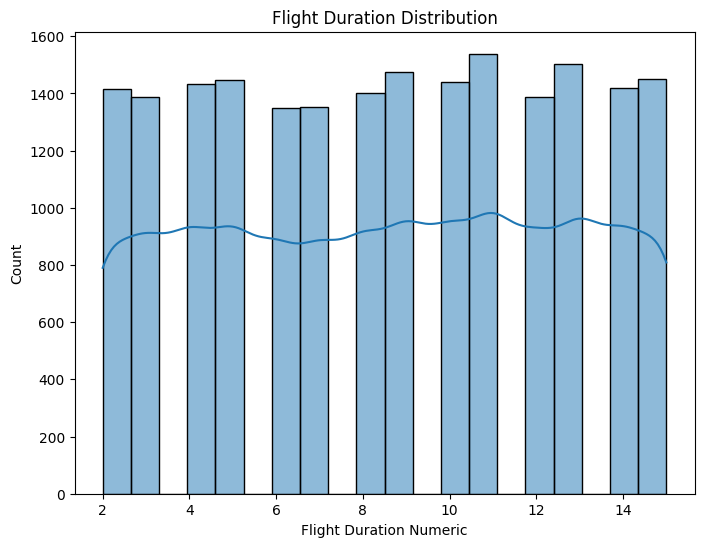

In [ ]:
# Step 6: Visualize 3 Month Upcoming Flights Data
# Flight Duration Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_3_month_upcoming['Flight Duration Numeric'], kde=True, bins=20)
plt.title('Flight Duration Distribution')
plt.show()

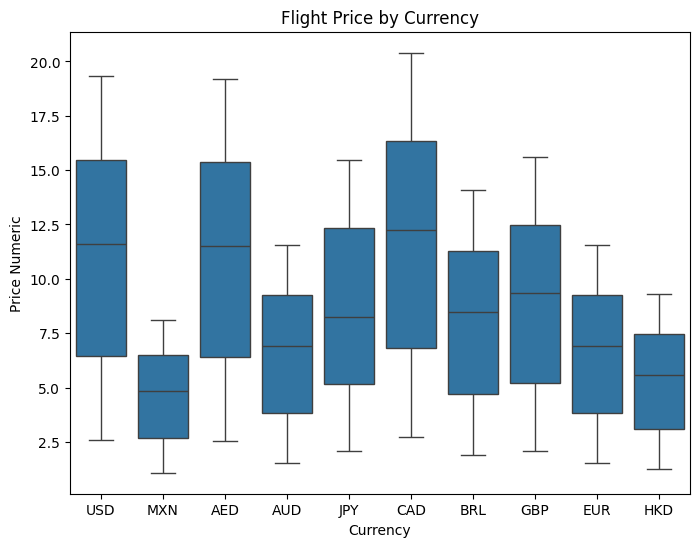

In [ ]:
# Flight Price by Currency
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_3_month_upcoming, x='Currency', y='Price Numeric')
plt.title('Flight Price by Currency')
plt.show()

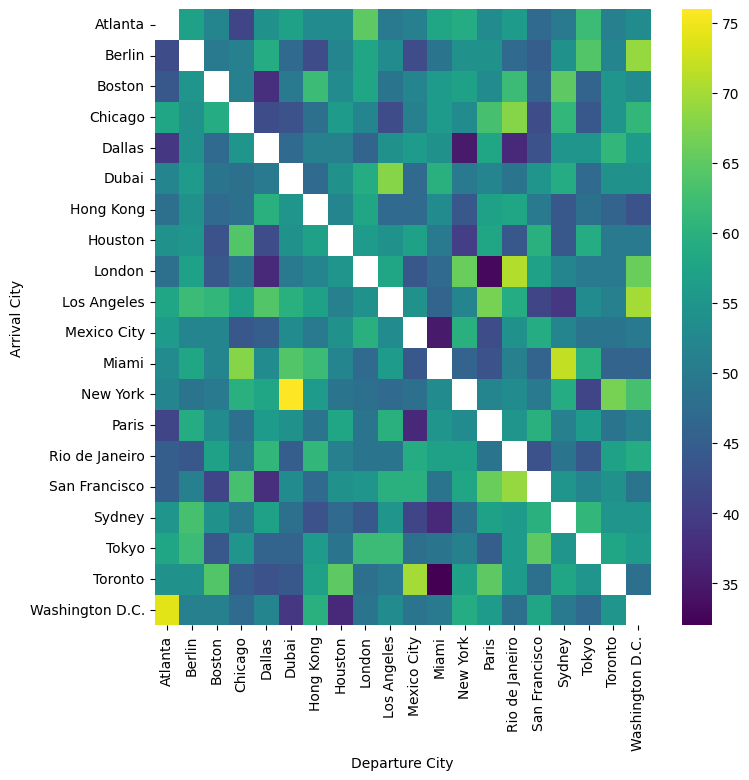

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Arrival City'].value_counts()
    for x_label, grp in df_3_month_upcoming.groupby('Departure City')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Departure City')
_ = plt.ylabel('Arrival City')

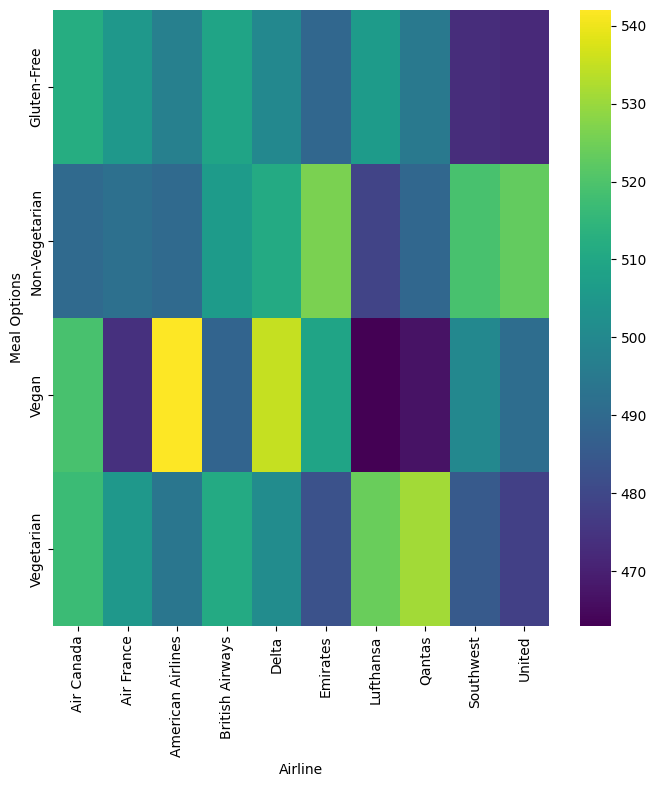

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Meal Options'].value_counts()
    for x_label, grp in df_3_month_upcoming.groupby('Airline')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Airline')
_ = plt.ylabel('Meal Options')

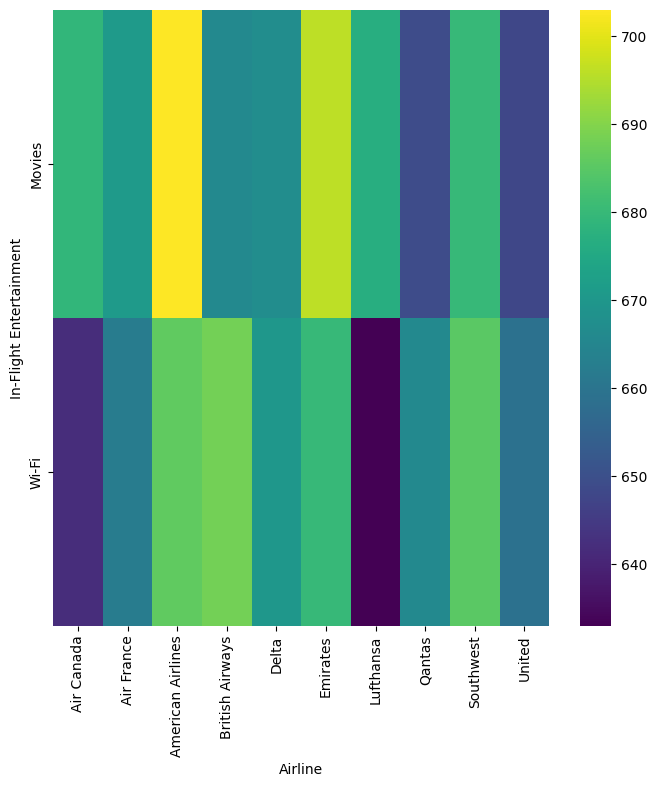

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['In-Flight Entertainment'].value_counts()
    for x_label, grp in df_3_month_upcoming.groupby('Airline')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Airline')
_ = plt.ylabel('In-Flight Entertainment')

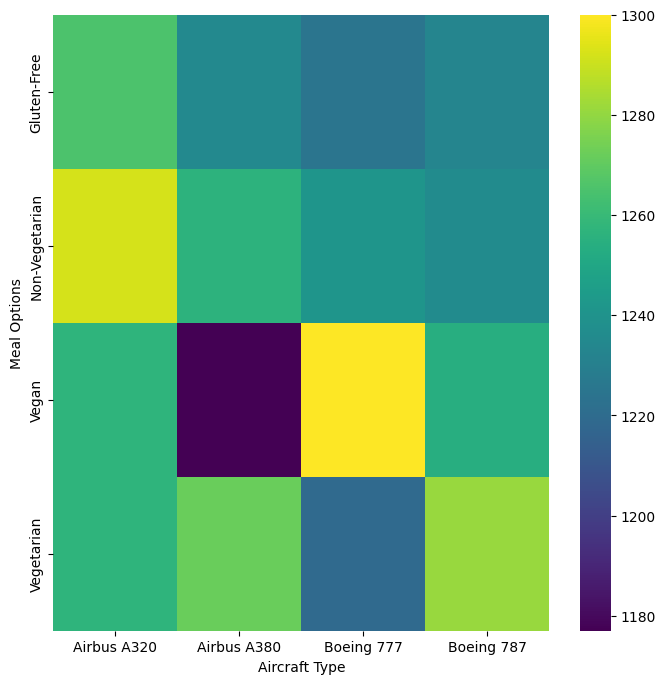

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Meal Options'].value_counts()
    for x_label, grp in df_3_month_upcoming.groupby('Aircraft Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Aircraft Type')
_ = plt.ylabel('Meal Options')

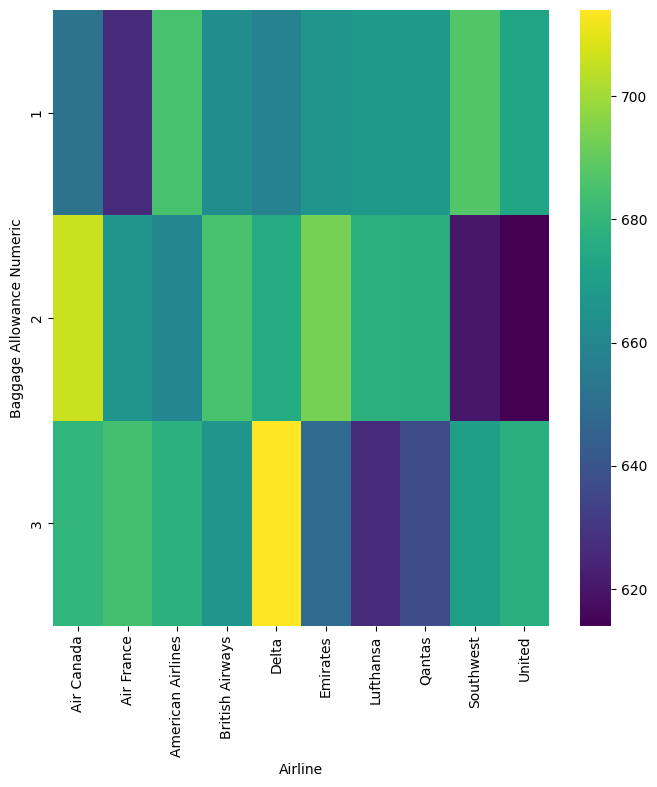

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Baggage Allowance Numeric'].value_counts()
    for x_label, grp in df_3_month_upcoming.groupby('Airline')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Airline')
_ = plt.ylabel('Baggage Allowance Numeric')

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Baggage Allowance Numeric'].value_counts()
    for x_label, grp in df_3_month_upcoming.groupby('Airline')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Airline')
_ = plt.ylabel('Baggage Allowance Numeric')

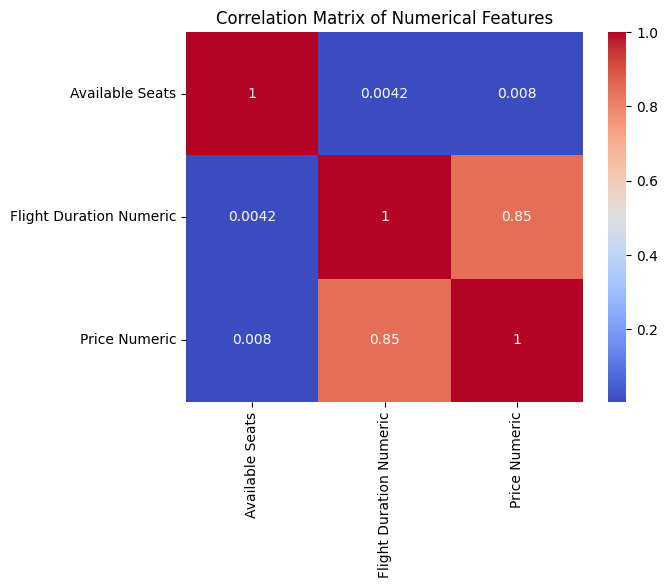

In [ ]:
# Select relevant columns
numerical_features = ['Available Seats', 'Flight Duration Numeric', 'Price Numeric']  # Assuming you created 'Booking Window'
data_subset = df_3_month_upcoming[numerical_features]

# Calculate correlation matrix
correlation_matrix = data_subset.corr()

# Visualize correlation using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

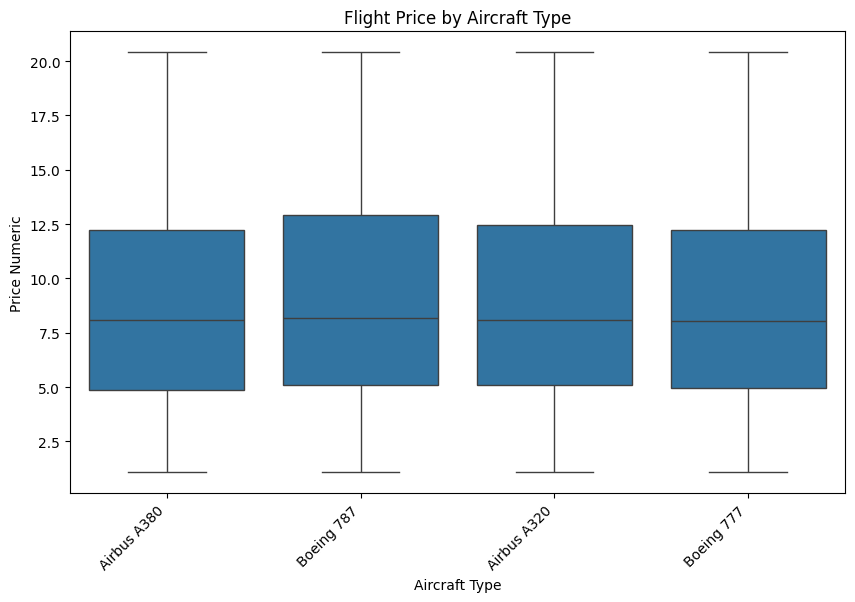

In [ ]:
# Example for 'Aircraft Type'
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(data=df_3_month_upcoming, x='Aircraft Type', y='Price Numeric')
plt.title('Flight Price by Aircraft Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

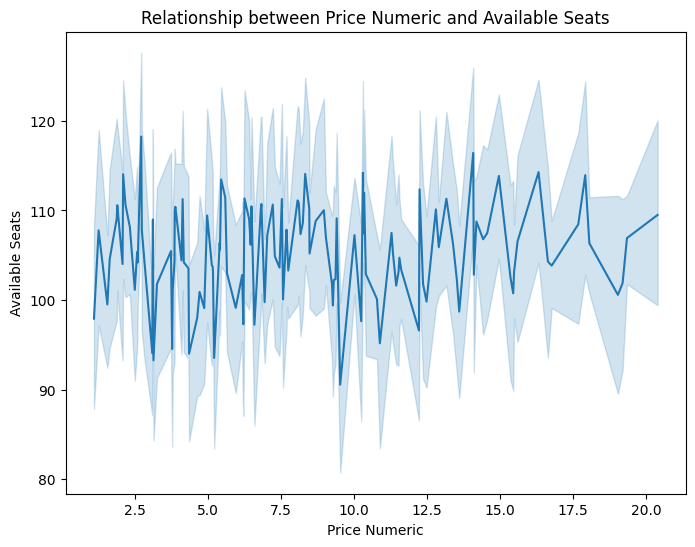

In [ ]:
#Relationship between Checked Bags and Add-On Spend:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_3_month_upcoming, x='Price Numeric' , y='Available Seats')
plt.title('Relationship between Price Numeric and Available Seats')
plt.show()

In [ ]:
#Relationship between Checked Bags and Add-On Spend:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_3_month_upcoming, x='Price Numeric' , y='')
plt.title('Relationship between Price Numeric and Available Seats')
plt.show()

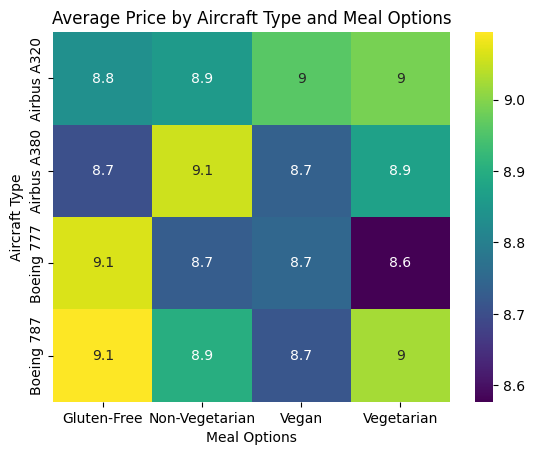

In [ ]:
heatmap_data = pd.pivot_table(df_3_month_upcoming, values='Price Numeric', index='Aircraft Type', columns='Meal Options', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis', annot=True)
plt.title('Average Price by Aircraft Type and Meal Options')
plt.show()

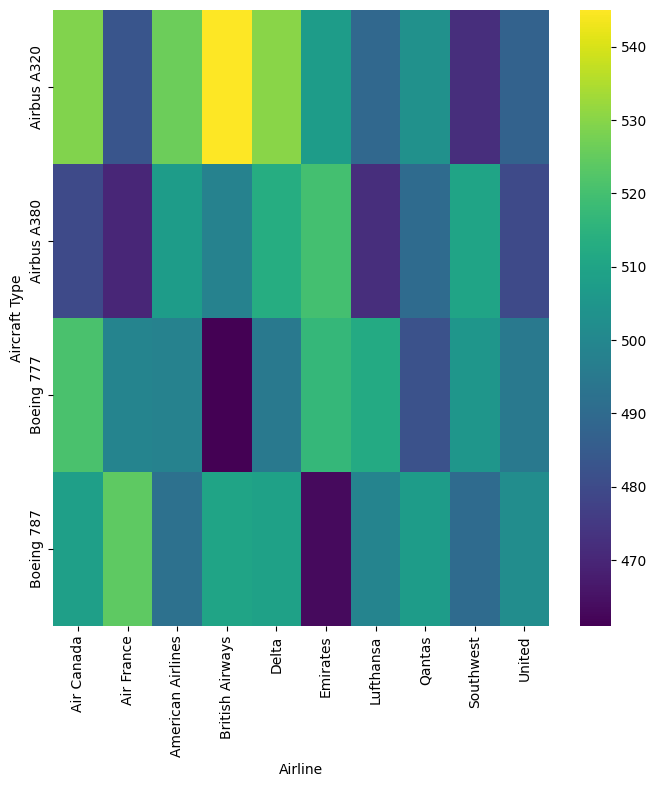

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Aircraft Type'].value_counts()
    for x_label, grp in df_3_month_upcoming.groupby('Airline')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Airline')
_ = plt.ylabel('Aircraft Type')

## Summarize findings

Key Finding from Analysis:


**Flight Delays:**

Significant delays are prevalent, with LAX and JFK airports showing the highest delay rates.

April is the month with the most flight delays and associated deals.


**Booking Patterns:**

Thursdays experience the highest deal count.
New flights are mostly scheduled on Fridays and Sundays.

**Customer Behavior:**

Fewer customers opt for online check-ins.
Customers who join loyalty programs tend to spend more on add-ons in the first years.

**Add-Ons & Spending:**

Snack purchases are more frequent when discounts or promotions are offered, but less so during partnerships and travel agency collaborations.

There is a notably low tendency for customers to purchase additional snacks, even during promotions.

Customers generally do not spend much on add-ons  when discounts or promotions are offered compared to snacks or lounge services.

**Customer Delays:**

The analysis identified top customers who faced significant delays during their travel.


**Trends:**

November sees the least activity in terms of flight deals and customer engagement.

# Predictive Models


**Goals and Challenges from Amy Rose's Interview Notes and Transcript**

**Goals:**

* **Enhance Competitiveness Against LCCs:** Delta aims to maintain an edge against low-cost carriers (LCCs) by refining customer experience and focusing on high-value customer retention.

* **Optimize Customer Experience:** Improving boarding processes and upgrading frequent flyers' experience is crucial, focusing on quicker upgrades and better rewards.

* **Effective Use of AI-CRM Integration:** Delta wants AI to help model competitive strategies, segment customers, predict maintenance needs, and automate communications to enrich customer service.

* **Silo Reduction and Data Integration:** Delta aims to break down data silos, particularly in customer experience and revenue data, to allow quicker and more informed decision-making.

* **Customer Behavior Insights:** Tracking customer engagement, particularly with loyalty programs, helps Delta in strategic planning for routes and service offerings.

* **Data Democratization:** Delta desires role-level security and access to data insights for leaders without needing granular details, while detailed data access is crucial for operational teams.

**Challenges:**

* **Competition from LCCs:** LCCs operate with fewer restrictions on certain routes, often capturing customers with lower costs and more direct flights.

* **Supply Chain Issues:** The Boeing strike poses challenges for plane deliveries, affecting Delta’s capacity and route availability.

* **Data Siloing and Accessibility:** Data silos cause delays in decision-making and increase operational costs, especially for reporting and customer experience insights.

* **Regulatory and Operational Constraints:** Issues with the Department of Transportation (e.g., flight refund policies) and potential limitations from low-cost carrier mergers add pressure to Delta’s operational strategy.

* **Resource Allocation for High-Value Customers:** Managing resources (like lounges) to best serve high-value customers can be challenging, particularly on less-traveled routes.
Recommendation: Logistic Predictive Models

**Model Choice Analysis**

1. **Linear Regression Models:** While effective for predicting continuous outcomes (e.g., predicting customer spending levels or lounge usage based on frequency), linear models fall short in providing clear classifications or segmentations, which are essential for customer-centric goals and customer segmentation. Additionally, linear models lack the flexibility to capture interactions between categorical features like loyalty tiers or routes.

2. **Logistic Regression Models:** Logistic models can effectively classify customer behaviors, such as determining which customers are likely to engage with loyalty programs, seek upgrades, or prefer certain routes. Logistic regression allows for binary and multi-class predictions, ideal for segmenting customers based on likelihoods, such as:

* **Likelihood of switching to an LCC:** Identifying customers at risk of choosing LCCs based on travel patterns and preferences.

* **Customer segmentation:** Classifying customers into high, medium, and low-value tiers based on loyalty behaviors, which directly informs Delta’s resource allocation (like lounge usage).

* **Predictive maintenance needs:** Logistic regression can classify equipment or maintenance needs into risk categories, enabling proactive management.

Thus, a **logistic regression model** is most suitable to address Delta’s challenges and align with its goals, especially where customer segmentation and strategic classification are involved. This model can help Delta Airlines personalize experiences and optimize service delivery in response to competitive and operational challenges.

#Modeling & Understanding Relationships

* Flight Deal & no a flight Deal
* Lead Source
* Delay / cancel , Airport




* Flight Duration
* Addon per destination

* Aircraft Type
* duration / option

Covariance Analysis: Two closely related variables for investigation could be:

* **Flight Delay** and **Total Number of Checked Bags**: Analyzing these may reveal if higher checked bag counts correlate with increased delay frequency.

* **Loyalty Points Earned** and  **Cost (Flight + Addons)**: This could provide insights into whether higher-spending customers earn more loyalty points.

Score

In [ ]:
df=  excel_file.parse('Frequent Flier Cleansed1')
df_frequent_flyer['Flight Delayed?']= df['Flight Delayed?']

In [ ]:
df_frequent_flyer['Flight Delayed?'] = df_frequent_flyer['Flight Delayed?'].astype(int)
df_frequent_flyer['Online Check-In'] = df_frequent_flyer['Online Check-In'].astype(int)
df_frequent_flyer['Lounge Used?'] = df_frequent_flyer['Lounge Used?'].astype(int)

In [ ]:
covariance = df_frequent_flyer['Online Check-In'].cov(df_frequent_flyer['Flight Delayed?'])
print(f"Covariance between 'Flight Delayed?' and 'Lounge Used?': {covariance}")

Covariance between 'Flight Delayed?' and 'Lounge Used?': 0.00031658554876615446


In [ ]:
# Calculate the average delay rate by Departure City
delay_by_city = df_frequent_flyer.groupby('Departing Airport')['Flight Delayed?'].mean()

# Display the results
print("Average delay rate by Departure City:")
print(delay_by_city)

Average delay rate by Departure City:
Departing Airport
ATL    0.487500
BOS    0.483266
CDG    0.522449
DEN    0.519774
DFW    0.498563
DXB    0.504098
HND    0.520492
JFK    0.503619
LAX    0.496425
LHR    0.479675
MIA    0.526611
ORD    0.490741
SEA    0.488975
SFO    0.518038
SIN    0.475000
SYD    0.547264
Name: Flight Delayed?, dtype: float64


In [ ]:
# Calculate covariance between 'Loyalty Points Earned' and 'Cost'
covariance_loyalty_cost = df_3_month_upcoming['Loyalty Points Earned'].cov(df_3_month_upcoming['Price Numeric'])

print(f"Covariance between 'Loyalty Points Earned' and 'Cost': {covariance_loyalty_cost}")


Covariance between 'Loyalty Points Earned' and 'Cost': 4295.599437717308


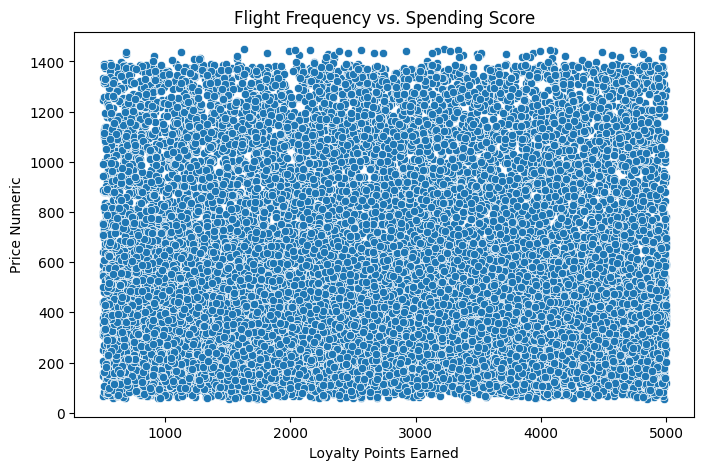

Correlation between Flight Frequency and Spending Score: 0.009419344180910429


In [ ]:
# Visualize relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_3_month_upcoming, x='Loyalty Points Earned', y='Price Numeric')
plt.title('Flight Frequency vs. Spending Score')
plt.show()

# Calculate Pearson correlation coefficient
correlation, _ = pearsonr(df_3_month_upcoming['Loyalty Points Earned'], df_3_month_upcoming['Price Numeric'])
print("Correlation between Flight Frequency and Spending Score:", correlation)

## Make Predection

In [ ]:
departure_airport= df_frequent_flyer['Departing Airport'].unique()  # Get unique departure time zones
arrival_airport= df_frequent_flyer['Arrival Airport'].unique()      # Get unique arrival time zones

# Combine both unique time zones into a single list
all_airport = set(departure_airport) | set(arrival_airport)  # Using set union to combine

# Step 4: Create a new DataFrame with unique time zones
unique_airport_df = pd.DataFrame(all_airport, columns=['Unique Airport'])

# Display the unique time zones DataFrame
print(unique_airport_df)

   Unique Airport
0             BOS
1             DEN
2             SEA
3             HND
4             ORD
5             SFO
6             SYD
7             LHR
8             JFK
9             DFW
10            CDG
11            MIA
12            LAX
13            DXB
14            SIN
15            ATL


In [ ]:
airport_city_map = {
    'BOS': 'Boston',
    'DEN': 'Denver',
    'SEA': 'Seattle',
    'HND': 'Tokyo',
    'ORD': 'Chicago',
    'SFO': 'San Francisco',
    'SYD': 'Sydney',
    'LHR': 'London',
    'JFK': 'New York',
    'DFW': 'Dallas',
    'CDG': 'Paris',
    'MIA': 'Miami',
    'LAX': 'Los Angeles',
    'DXB': 'Dubai',
    'SIN': 'Singapore',
    'ATL': 'Atlanta'
}

In [ ]:
df_frequent_flyer['Departure City'] = df_frequent_flyer['Departing Airport'].map(airport_city_map)
df_frequent_flyer['Arrival City'] = df_frequent_flyer['Arrival Airport'].map(airport_city_map)

In [ ]:
features = ['Departure City', 'Arrival City']
X = df_frequent_flyer[features]
y = df_frequent_flyer['Flight Delayed?']
X.head()

,Departure City,Arrival City
0,Tokyo,Tokyo
1,New York,San Francisco
2,Paris,Chicago
3,Seattle,Denver
4,San Francisco,Dubai


In [ ]:
# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<ipython-input-231-9d99f7ba3a17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
<ipython-input-231-9d99f7ba3a17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01)

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2' , 'l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=LR, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/

In [ ]:
print("Best Score: %f \nBest params : %s" % (grid_result.best_score_, grid_result.best_params_))

Best Score: 0.501163 
Best params : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.1 , penalty='l1',solver='liblinear')
LR.fit(X_train,y_train)
print('Logistic Regression Train Score :',LR.score(X_train,y_train))
print('Logistic Regression Test Score :',LR.score(X_test,y_test))

Logistic Regression Train Score : 0.507057546145494
Logistic Regression Test Score : 0.5047033285094067


In [ ]:
y_predict_LR=LR.predict(X_test)
print('Y Predict: ',y_predict_LR)

Y Predict:  [1 1 0 ... 1 1 1]


In [ ]:
acc_LR=accuracy_score(y_test,y_predict_LR)
print(acc_LR)

0.5047033285094067


In [ ]:
CR_LR=classification_report(y_test,y_predict_LR)
print(CR_LR)

              precision    recall  f1-score   support

           0       0.52      0.21      0.30      1392
           1       0.50      0.80      0.62      1372

    accuracy                           0.50      2764
   macro avg       0.51      0.51      0.46      2764
weighted avg       0.51      0.50      0.46      2764



### K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
param_grid = {'n_neighbors': list(range(1,31))}
grid_search = GridSearchCV(knn, param_grid, cv=3,scoring='accuracy')
grid_result = grid_search.fit(X_train,y_train)

In [ ]:
print("Best score: %f \nBest params : %s" % (grid_result.best_score_, grid_result.best_params_))

Best score: 0.510160 
Best params : {'n_neighbors': 3}


In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print('KNN Train Score :',knn.score(X_train,y_train))
print('KNN Test Score :',knn.score(X_test,y_test))

KNN Train Score : 0.5227237474794478
KNN Test Score : 0.5097684515195369


In [ ]:
y_predict_knn=knn.predict(X_test)
print(y_predict_knn)

[1 0 1 ... 0 1 1]


In [ ]:
acc_knn=accuracy_score(y_test,y_predict_knn)
print(acc_knn)

0.5097684515195369


In [ ]:
cr_knn=classification_report(y_test,y_predict_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1392
           1       0.51      0.53      0.52      1372

    accuracy                           0.51      2764
   macro avg       0.51      0.51      0.51      2764
weighted avg       0.51      0.51      0.51      2764



### Randome Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
grid = {
    'n_estimators': [10, 100, 1000],
    'max_depth' : [4,5,6,7,8],
}
grid_search = GridSearchCV(rf, param_grid=grid, cv=3,scoring='accuracy')
grid_result = grid_search.fit(X_train,y_train)

In [ ]:
print("Best Score : %f \nBest param : %s" % (grid_result.best_score_, grid_result.best_params_))

Best Score : 0.501008 
Best param : {'max_depth': 6, 'n_estimators': 10}


In [ ]:
rf=RandomForestClassifier(max_depth=6,n_estimators=10)
rf.fit(X_train,y_train)
print('Random Force Train Score :',rf.score(X_train,y_train))
print('Random Force Test Score :',rf.score(X_test,y_test))

Random Force Train Score : 0.5444392740809679
Random Force Test Score : 0.5003617945007236


In [ ]:
y_pred_rf=rf.predict(X_test)
print('Y Pred',y_pred_rf)

Y Pred [0 1 1 ... 1 1 0]


In [ ]:
acc_rf=accuracy_score(y_test,y_pred_rf)
print('Accuracy Score',acc_rf)

Accuracy Score 0.5003617945007236


Predict delays on Sheet 3

In [ ]:
sheet3_data_Encoded = df_3_month_upcoming[['Departure City', 'Arrival City']]
sheet3_data_Encoded.head()

label_encoder = LabelEncoder()
for col in sheet3_data_Encoded.select_dtypes(include=['object']).columns:
    sheet3_data_Encoded[col] = label_encoder.fit_transform(sheet3_data_Encoded[col])

<ipython-input-256-a9c777211bfb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet3_data_Encoded[col] = label_encoder.fit_transform(sheet3_data_Encoded[col])
<ipython-input-256-a9c777211bfb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet3_data_Encoded[col] = label_encoder.fit_transform(sheet3_data_Encoded[col])


In [ ]:
predictions = knn.predict(sheet3_data_Encoded)
print("Predictions:", predictions)

Predictions: [0 0 1 ... 1 1 0]


In [ ]:
df_3_month_upcoming['Flight Delayed?'] = predictions
mapping = {0: "False", 1: "True"}
df_3_month_upcoming['Flight Delayed?'] = df_3_month_upcoming['Flight Delayed?'].map(mapping)
df_3_month_upcoming.head()

,Flight_ID,Flight Date,Departure City,Arrival City,Departure Time,Arrival Time,Departure Time Zone,Arrival Time Zone,Airline,Flight Number,...,Aircraft Type,Loyalty Points Earned,Flight Duration Numeric,Baggage Allowance Numeric,Price Numeric,Month,Year,Day,Day of Week,Flight Delayed?
0,FL22340,2024-09-19,Los Angeles,Miami,10:46:00,16:46:00,PST,MST,Air France,So7354,...,Airbus A380,1769,10,2,756.16,September,2024,19,Thursday,False
1,FL33887,2024-09-18,London,Chicago,02:46:00,11:46:00,UTC,CST,Lufthansa,So7520,...,Boeing 787,1442,4,3,945.20,September,2024,18,Wednesday,False
2,FL97305,2024-10-19,Miami,Rio de Janeiro,23:46:00,09:46:00,CST,UTC,Southwest,Ai7156,...,Airbus A320,3956,9,2,560.40,October,2024,19,Saturday,True
3,FL74009,2024-09-23,Miami,Chicago,23:46:00,02:46:00,PST,UTC,Air France,Un7843,...,Airbus A380,1269,8,2,1134.24,September,2024,23,Monday,False
4,FL89456,2024-10-26,Hong Kong,Miami,05:46:00,14:46:00,UTC,MST,British Airways,Un1561,...,Boeing 777,3359,5,1,1010.16,October,2024,26,Saturday,True


# Recommendations

1. Addressing Flight Delays:


**Recommendation:**

* **Proactive Communication & Compensation:** Given the high number of delays, particularly at LAX and JFK, implementing proactive communication strategies (e.g., real-time delay notifications, personalized alerts) can improve customer satisfaction. Offering compensation or incentives, such as discount vouchers for future flights or priority boarding, can help mitigate the negative impact of delays.

* **Action Plan:** Establish partnerships with airlines and airports to enhance on-time performance or offer timely customer support in case of delays.



2. Enhancing Online Check-In Engagement:

**Recommendation:**

* **Incentivize Online Check-In:** With fewer customers opting for online check-in, airlines and travel agencies should consider providing incentives, such as discounts on future services or add-ons for customers who check-in online.

* **Action Plan:** Promote online check-in more effectively through targeted marketing, reminding customers of the benefits, including faster processing and priority seating.

3. Leveraging High Deal Days (Thursdays):

**Recommendation:**

* Maximize Thursdays' Deal Potential: Since Thursdays show the highest deal count, airlines and travel agencies can run exclusive promotions or flash sales on this day to drive more bookings.

* **Action Plan:** Focus on marketing campaigns for Thursdays, using email alerts, mobile app notifications, and targeted ads.

4. Optimize Flight Scheduling on Fridays and Sundays:

**Recommendation:**

* Optimize Flight Scheduling for High-Demand Days: With new flights frequently scheduled on Fridays and Sundays, airlines should ensure these flights are well-promoted and consider offering time-sensitive promotions to encourage last-minute bookings.

* **Action Plan:** Collaborate with travel agencies to create package deals that cater to weekend travelers, promoting early booking discounts.

5. Maximizing Snack Sales During Promotions:

**Recommendation:**

* **Offer Snack Bundles During Promotions:** Since snacks are more likely to be purchased during discount promotions, consider bundling them with other services, such as seat upgrades or lounge access, to increase overall sales.

* **Action Plan:** Develop limited-time snack bundles or meal packages that encourage passengers to purchase additional snacks during their booking or check-in process.

6. Boosting Additional Add-On Sales:

**Recommendation:**

* **Focus on Cross-Selling Add-Ons:** Given the lower customer spend on add-ons compared to snacks and lounge services, airlines should enhance the appeal of add-ons through targeted promotions, especially during flight booking or check-in.

* **Action Plan:** Create tailored offers that combine add-ons with popular services (like lounge access or Wi-Fi) at a discount or as part of a loyalty program reward.

7. Identifying and Targeting Customers Facing Delays:

**Recommendation:**

* **Personalized Support for Delayed Passengers:** Based on the analysis of customers who faced delays, airlines can create personalized compensation plans, such as offering targeted offers for future travel or upgrading services to customers affected by delays.

* **Action Plan:** Use CRM tools to segment customers who frequently experience delays, offering them early access to upgrades or promotional deals to improve their overall experience.

8. Promoting Activities in November:

**Recommendation:**

* **Increase November Engagement:** With lower activity in November, airlines and travel agencies should create special offers, loyalty perks, or themed travel packages to drive more customer engagement during this slow month.

* **Action Plan:** Use data from past years to identify peak booking windows in November and run targeted campaigns like early bird offers or exclusive discounts to boost activity.

9. Increase Customer Engagement through Loyalty Programs:

**Recommendation:**

* **Enhance Loyalty Programs:** Customers who join loyalty programs spend more on add-ons. By enriching loyalty programs with more personalized rewards, such as free snacks, priority seating, or special promotions on add-ons, airlines can further increase engagement and spending.

* **Action Plan:** Introduce tier-based rewards systems that provide more valuable perks for repeat customers, particularly those who frequently experience delays.